### Load Data

**Importing necessary librarie**

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline

**Load the Data & Taking a look at the dataset**

In [118]:
# Reading the dataset and converting it into a dataframe
df = pd.read_csv(r'C:\Credit card fraud\CreditCardFraudDetection\creditcard.csv')

In [119]:
# Taking a look at the first 5 rows of the dataset
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [120]:
# Taking a look at the last 5 rows of the dataset
df.tail()

Time         V1         V2        V3        V4        V5  \
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[5 rows x 31 columns]

### EXPLORATORY DATA ANALYSIS (EDA)

In [121]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [122]:
df.shape

(284807, 31)

**Dataset overview**
+ Dataset consists of 284807 lines and 31 columns.
+ There are no null values in the data.

In [123]:
# Checking for null values
df.isnull().sum().max()

0

In [124]:
# Checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [125]:
# Descriptive analysis
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [126]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checking Duplicate values and Outlier values

In [127]:
# Checking for any duplicate rows
df.duplicated(keep=False).sum()

1854

In [128]:
# Find duplicate rows, considering all columns, marking all duplicates as True
duplicates_all = df.duplicated(keep=False)

In [129]:
df_duplicated = df[duplicates_all]
df_duplicated

Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  ...       V21       V22       V23  \
32      0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
33      0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
34      0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
35      0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
112    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
...          ...       ...       ...  ...       ...       ...       ...   
283485 -0.282535  0.880654  0.052808  ...  0.284205  0.949659 -0.216949   
284190 -0.667233  2.309700 -1.639306  ...  0.391483  0.266536 -0.079853   
284191 -0.667233  2.309700 -1.639306  ...  0.391483  0.266536 -0.079853   
284192 -0.745886  2.325616 -1.634651  ...  0.402639  0.259746 -0.086606   
284193 -0.745886  2.325616 -1.634651  ...  0.402639  0.259746 -0.086606   

             V24       V25       V26       V27       V28  Amount  Class  
32      0.001031  0.098816 -0.552904 -0.073288  0.023307    6.14      0  
33      0.001031  0.098816 -0.552904 -0.073288  0.023307    6.14      0  
34      0.000753  0.098117 -0.553471 -0.078306  0.025427    1.77      0  
35      0.000753  0.098117 -0.553471 -0.078306  0.025427    1.77      0  
112    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
...          ...       ...       ...       ...       ...     ...    ...  
283485  0.083250  0.044944  0.639933  0.219432  0.116772   11.93      0  
284190 -0.096395  0.086719 -0.451128 -1.183743 -0.222200   55.66      0  
284191 -0.096395  0.086719 -0.451128 -1.183743 -0.222200   55.66      0  
284192 -0.097597  0.083693 -0.453584 -1.205466 -0.213020   36.74      0  
284193 -0.097597  0.083693 -0.453584 -1.205466 -0.213020   36.74      0  

[1854 rows x 31 columns]

In [130]:

# Remove duplicate rows but keep the first occurrence of each duplicate
df_unique = df.drop_duplicates(keep='first')

print("Original row count:", len(df))
print("Row count after removing duplicates:", len(df_unique))

Original row count: 284807
Row count after removing duplicates: 283726


The data removed duplicate records

### Data Visualization

In [131]:
df_unique["Class"].describe()

count    283726.000000
mean          0.001667
std           0.040796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

Class
0    283253
1       473
Name: count, dtype: int64


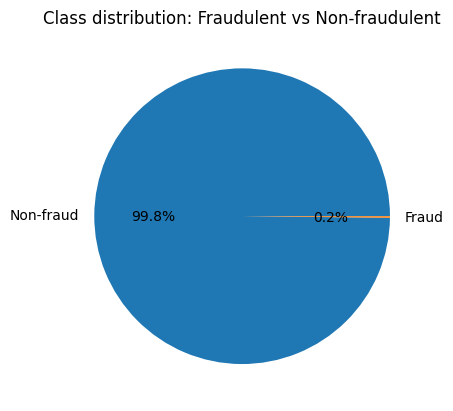

In [132]:
# Creating pie chart to visualize class distribution
plt.pie([(df_unique['Class']==0).sum() , (df_unique['Class']==1).sum()], labels=('Non-fraud' , 'Fraud'), autopct='%1.1f%%')
plt.title('Class distribution: Fraudulent vs Non-fraudulent')

print(df_unique.Class.value_counts())

Data is Highly Imbalanced.

In [133]:
# Time statistical summary across fraudulent and non-fraudulent transactions.
print ("Fraudulent")
print (df_unique.Time[df_unique.Class == 1].describe())
print ()
print ("Non-Fraudulent")
print (df_unique.Time[df_unique.Class == 0].describe())

Fraudulent
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Non-Fraudulent
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


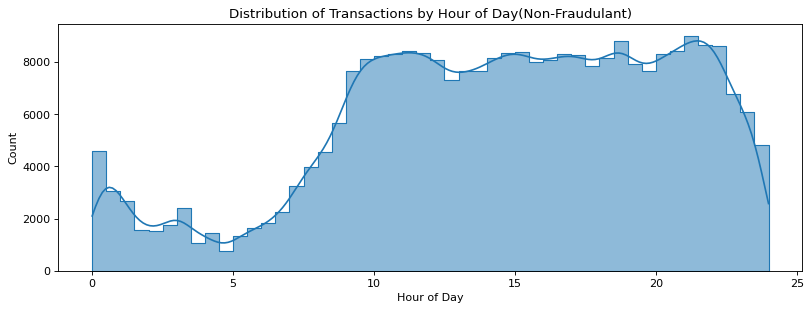

In [134]:
#Count of non fraudulant transaction over hours 
df_unique['Time_hours'] = df_unique['Time'] / 3600  # Convert time to hours for easier analysis
df_unique['Time_hours'] = df_unique['Time_hours'] % 24  # Convert to hours in a day

plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(data=df_unique, x='Time_hours', bins=48, kde=True, element='step')
plt.title('Distribution of Transactions by Hour of Day(Non-Fraudulant)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()


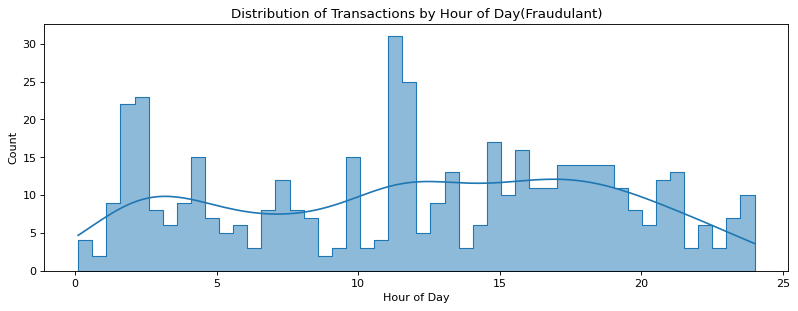

In [135]:
#Count of fraudulant transaction over hours
df_copy_fraud=df_unique[df_unique['Class']==1]
df_copy_fraud['Time_hours'] = df_copy_fraud['Time'] / 3600  # Convert time to hours for easier analysis
df_copy_fraud['Time_hours'] = df_copy_fraud['Time_hours'] % 24  # Convert to hours in a day

plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(data=df_copy_fraud, x='Time_hours', bins=48, kde=True, element='step')
plt.title('Distribution of Transactions by Hour of Day(Fraudulant)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

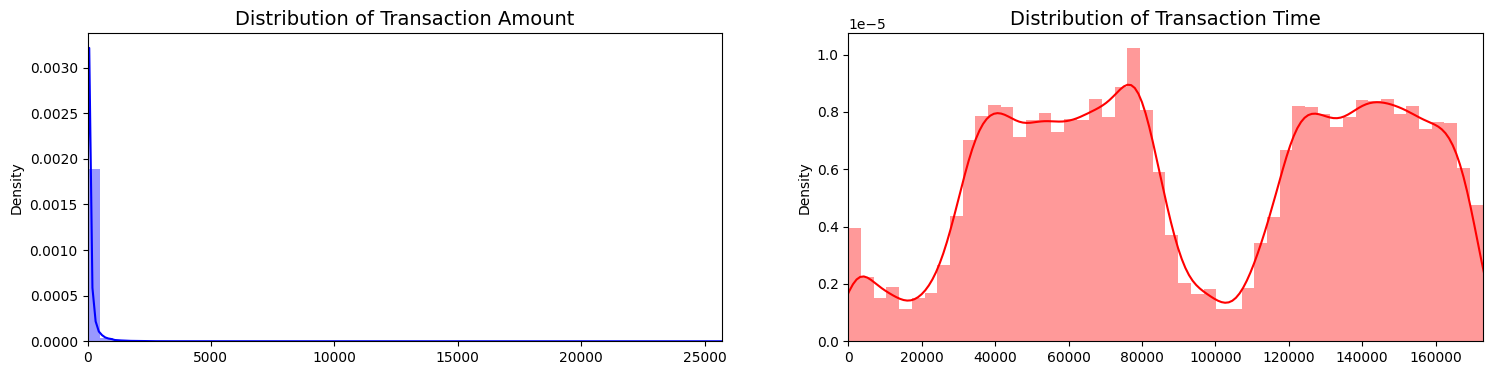

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df_unique['Amount'].values
time_val = df_unique['Time'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show();

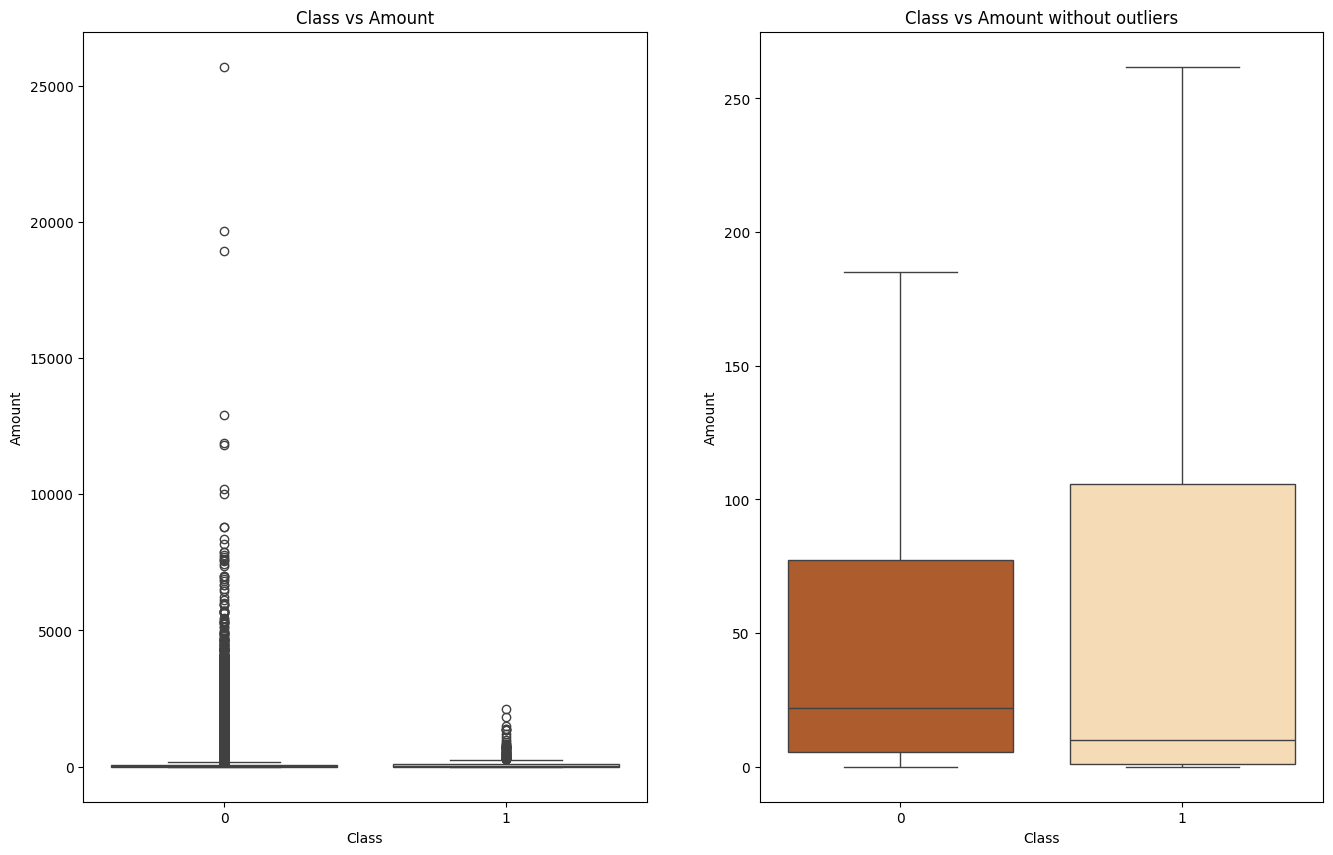

In [137]:


fig, axes = plt.subplots(ncols=2, figsize=(16,10))
colors = ['#C35617', '#FFDEAD']

sns.boxplot(x="Class", y="Amount", data=df_unique, palette = colors, ax=axes[0], showfliers=True)
axes[0].set_title('Class vs Amount')

sns.boxplot(x="Class", y="Amount", data=df_unique, palette = colors, ax=axes[1], showfliers=False)
axes[1].set_title('Class vs Amount without outliers')

plt.show();

**Observation:** 
+ The range of 'Amount' values of data is very different, implementing machine learning algorithms without scaling will result in Machine Learning goals that will not work properly without normalization.
+ Non-Fraud transactions have large average values, large 'Q1', 'Q3' and 'Q4' are smaller and larger than exceptions.
+ Fraudulent transactions have a smaller 'Q1' and a larger average 'Q4' and smaller exceptions.

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

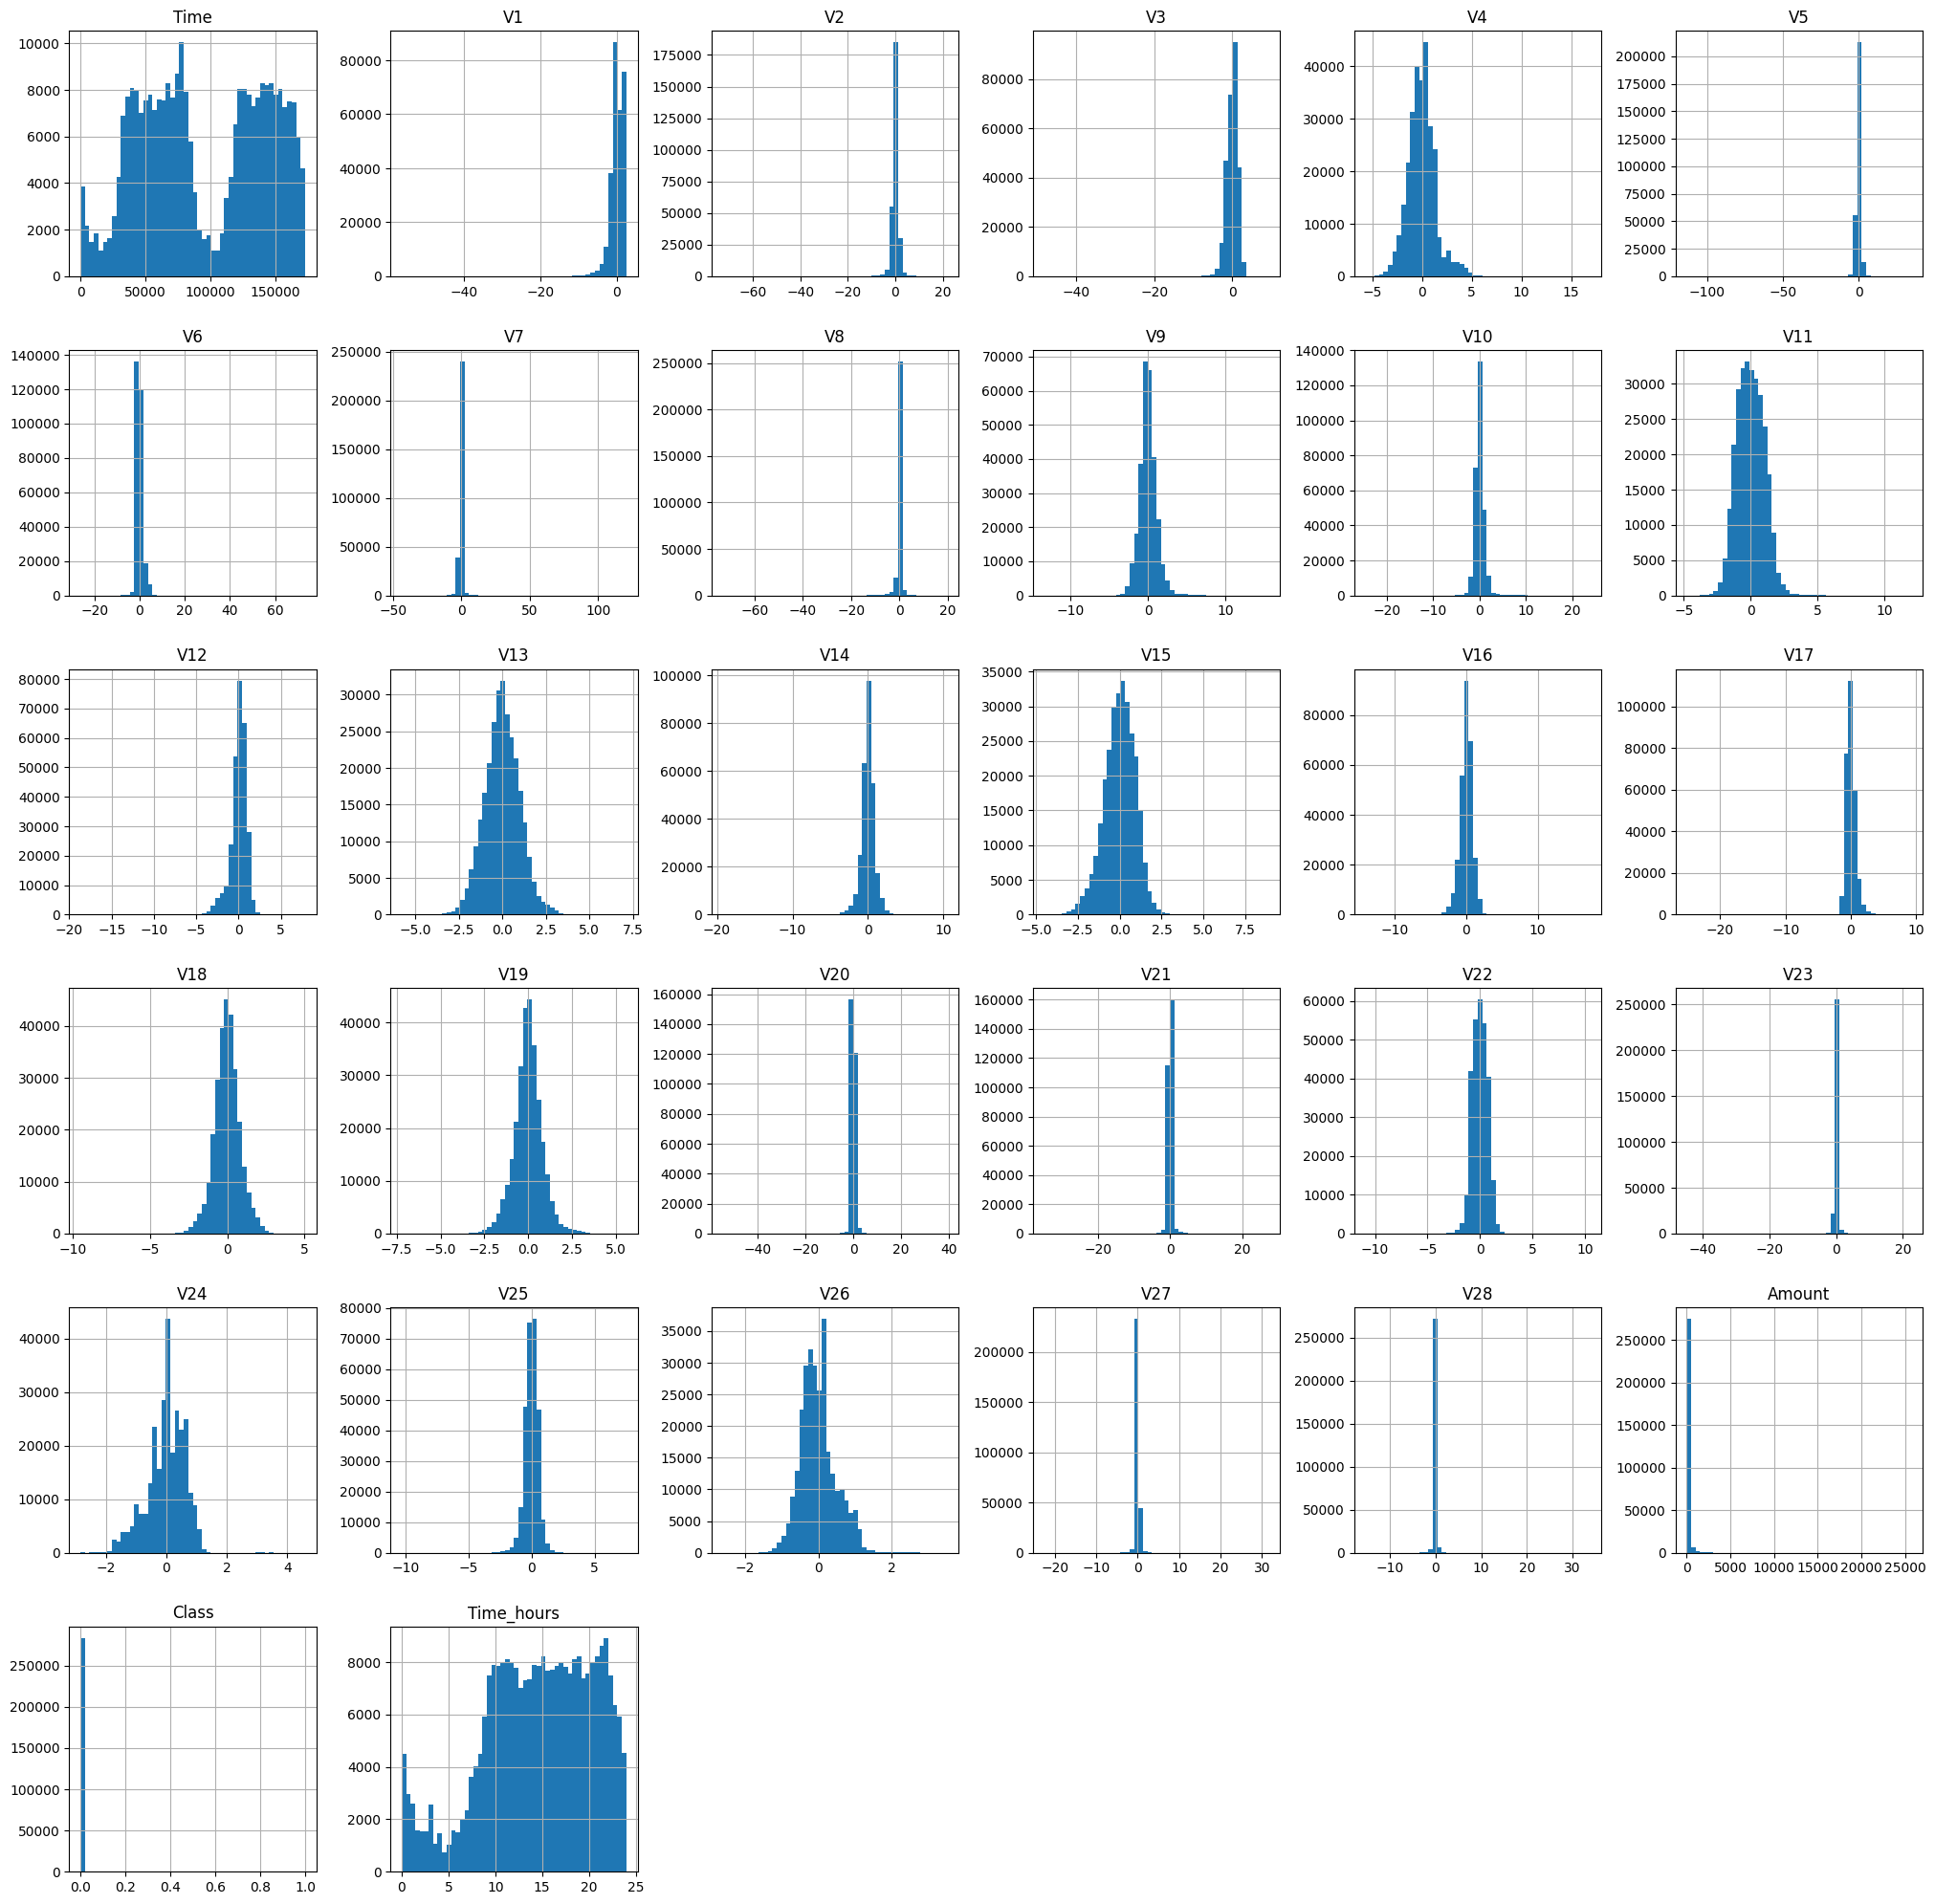

In [138]:
# Creating histograms for numerical columns to visualize data distribution
df_unique.hist(bins=50, figsize=(25,25) , grid = True)

It can be seen that all the features except time and amount are shaped normal. This means time and amount need to be scaled.

Text(0.5, 1.0, 'Non Fraud')

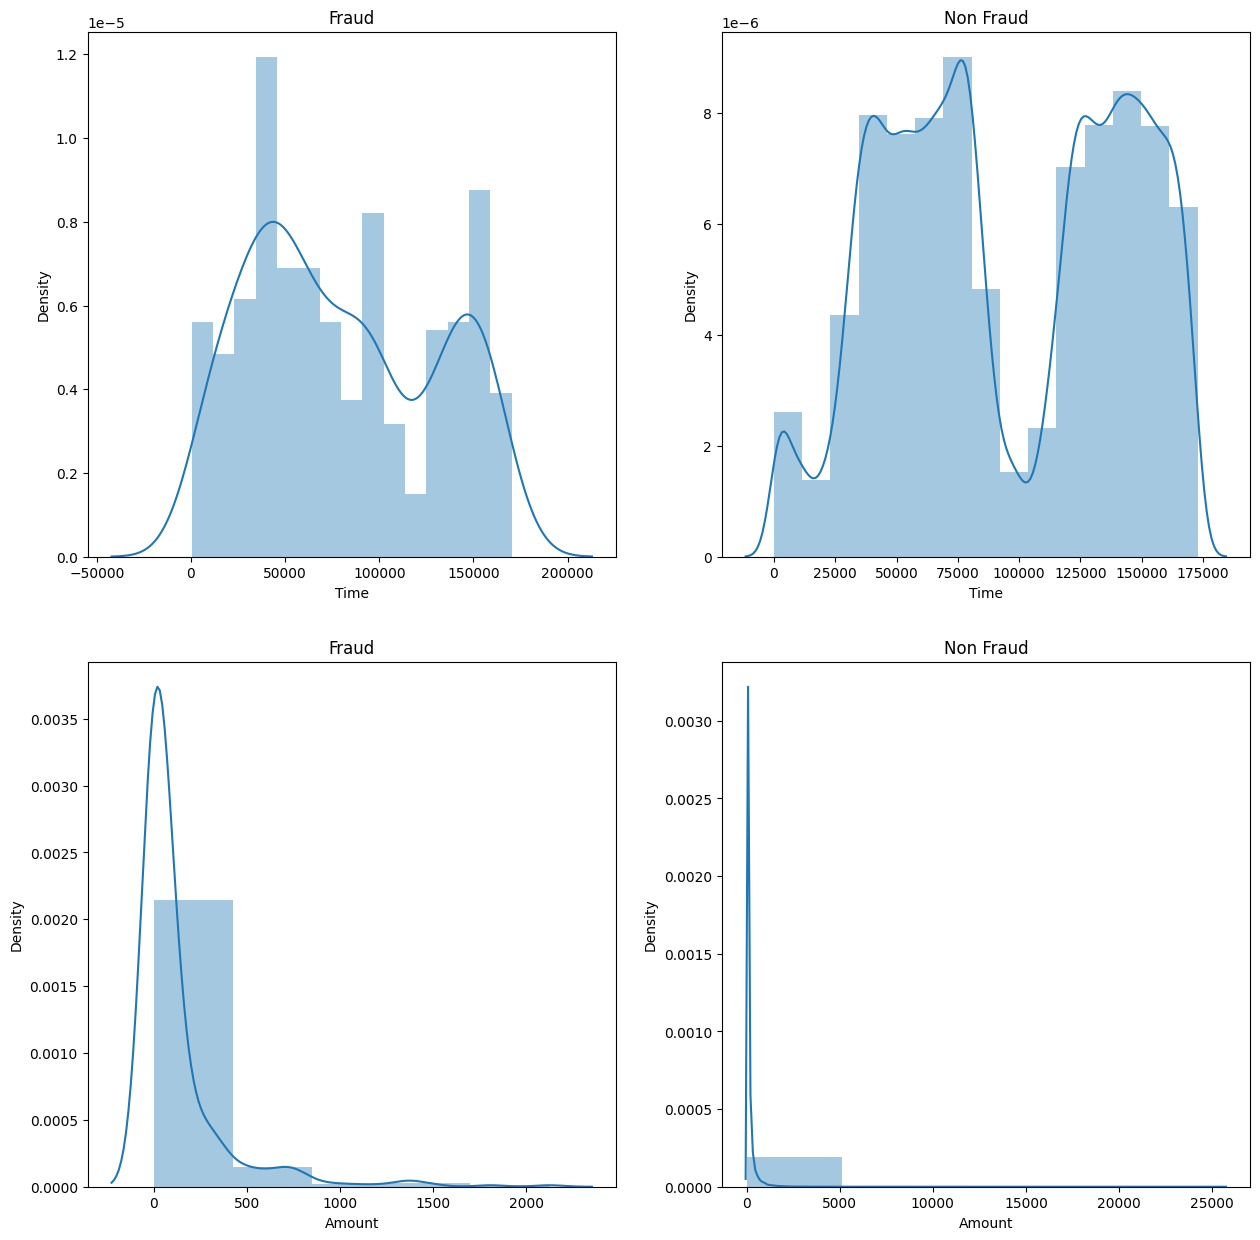

In [139]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
sns.distplot(df_unique['Time'][df_unique['Class'] == 1], bins=15, ax=ax1)
sns.distplot(df_unique['Time'][df_unique['Class'] == 0], bins=15, ax=ax2)

sns.distplot(df_unique['Amount'][df_unique['Class'] == 1], bins=5, ax=ax3)
sns.distplot(df_unique['Amount'][df_unique['Class'] == 0], bins=5, ax=ax4)

ax1.set_title('Fraud')
ax2.set_title('Non Fraud')
ax3.set_title('Fraud')
ax4.set_title('Non Fraud')


In [140]:
correlation_matrix = df_unique.corr()

# Print the correlation matrix
print(correlation_matrix)

                Time        V1        V2        V3        V4        V5  \
Time        1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223   
V1          0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036   
V2         -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210   
V3         -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879   
V4         -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744   
V5          0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000   
V6         -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938   
V7          0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709   
V8         -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430   
V9         -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213   
V10         0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050   
V11        -0.248536  0.001028 -0.000633  0.002339 -0.001223  0.000411   
V12         0.125500 -0.001524  0.0022

<Axes: >

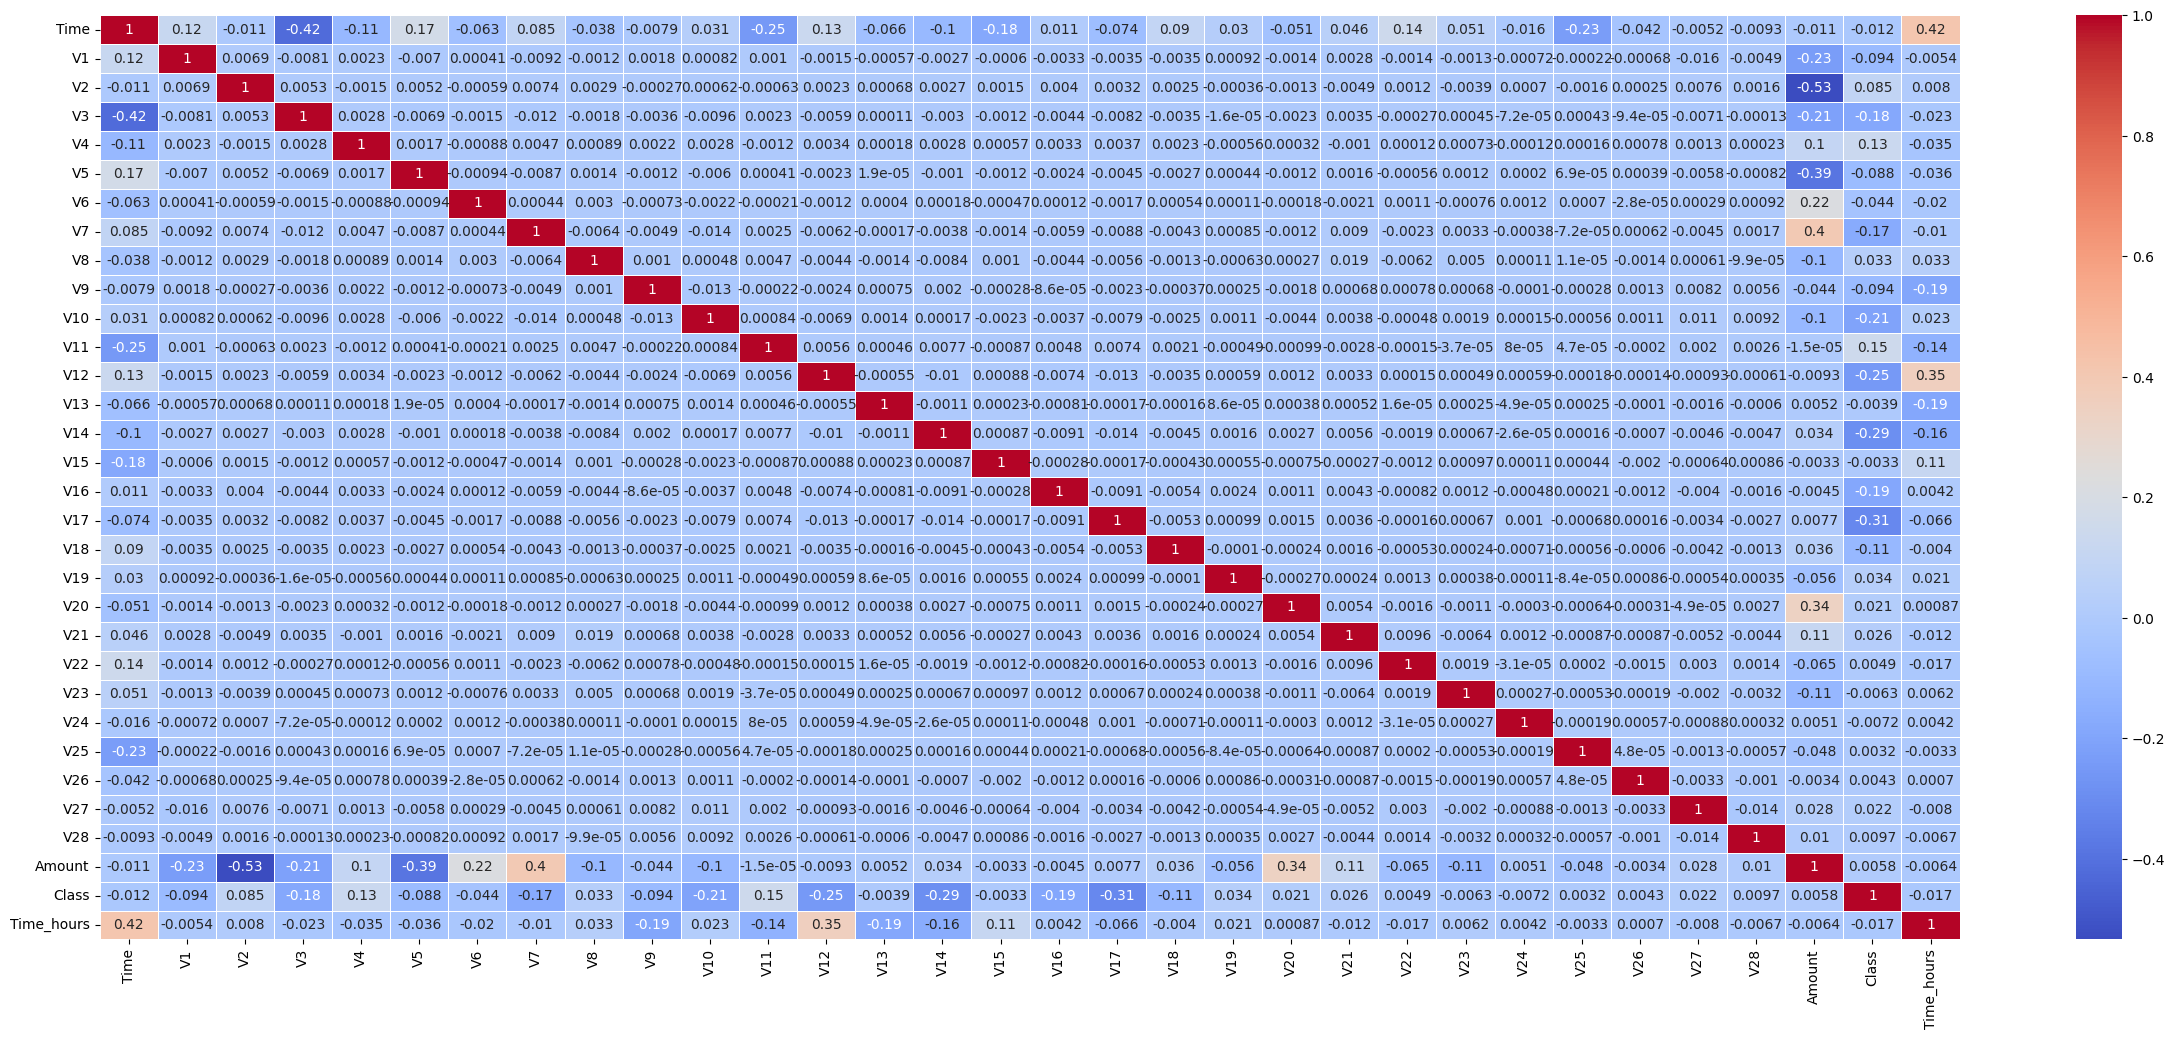

In [141]:

# Assuming your correlation matrix is stored in 'correlation_matrix'
plt.figure(figsize=(30, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


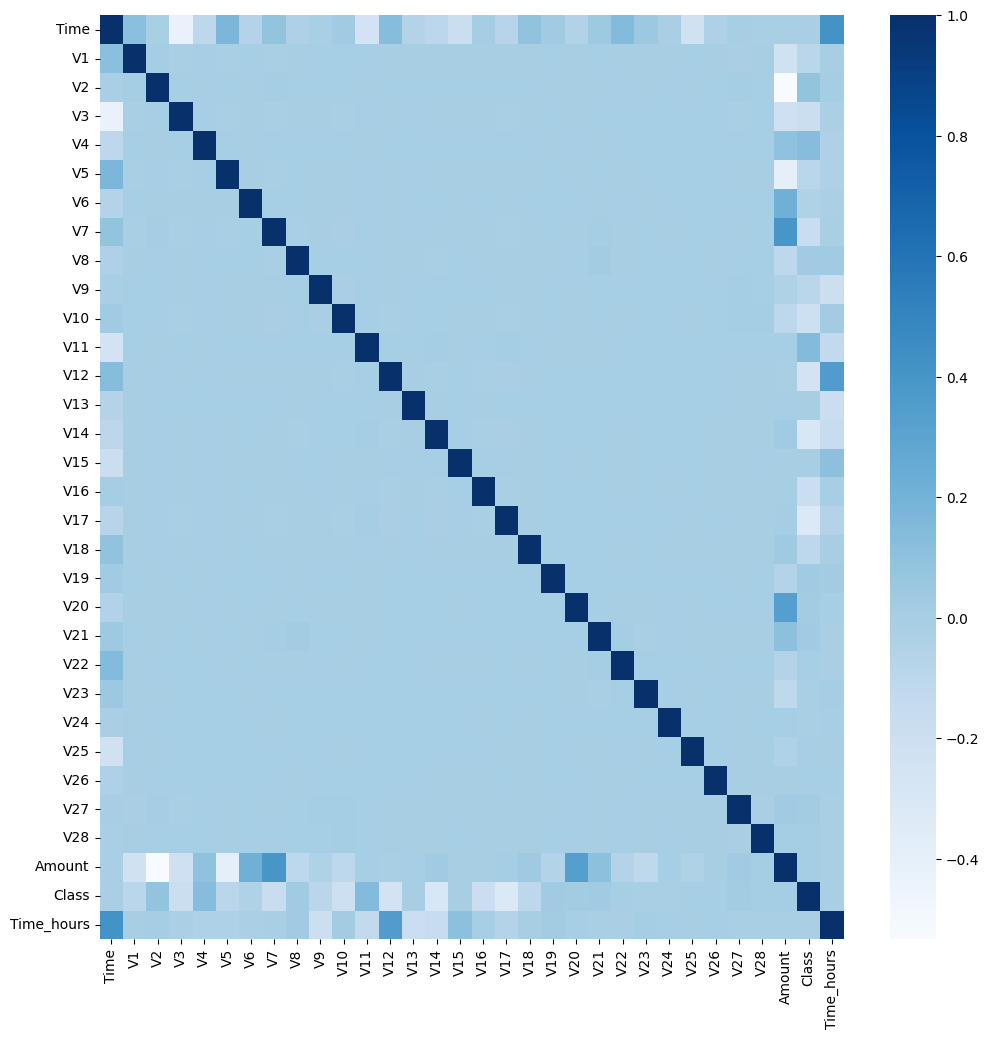

In [142]:
fig=plt.figure(figsize= (12, 12)) 
sns.heatmap(df_unique.corr(), cmap='Blues')
plt.show()


**Observation:** There is no noticeable correlation between V1~V28 features. There is certain correlation between some of these features with 'Time' (which correlates inversely with V3) and 'Amount' (which directly correlates with V7 and V20, which negatively correlates with V1, V2 and V5).

In [143]:
from scipy.stats import iqr
upper_limit =df_unique['Amount'].quantile(0.75)+(1.5*iqr(df_unique['Amount']))
print(upper_limit)
print(df_unique[df_unique['Amount']>upper_limit]['Class'].value_counts())


185.375
Class
0    31598
1       87
Name: count, dtype: int64


In [144]:
df_unique = df_unique[df_unique['Amount']<=8000]
print(df_unique['Class'].value_counts())
print('\nPercentage of Fraudulant activity:{:.2%}'.format((df_unique[df_unique['Class']==1].shape[0]/df_unique.shape[0])))

Class
0    283241
1       473
Name: count, dtype: int64

Percentage of Fraudulant activity:0.17%


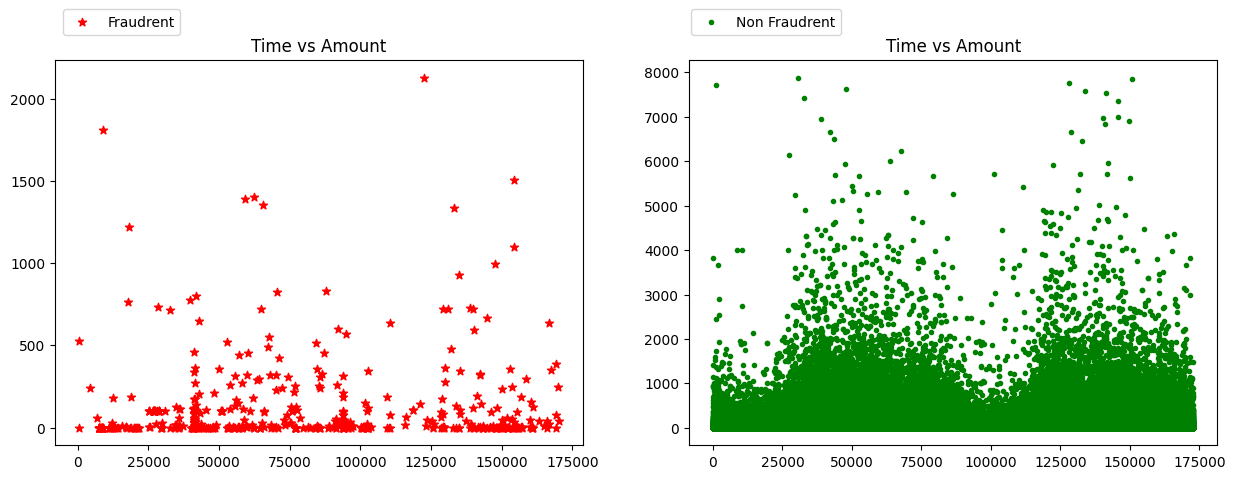

In [145]:
# plotting relation with different scale
class1 = df_unique[df_unique['Class']==1]
class0 = df_unique[df_unique['Class']==0]
fig, ax = plt.subplots(1,2, figsize=(15, 5))

ax[0].scatter(class1['Time'], class1['Amount'], color='red', marker= '*', label='Fraudrent')
ax[0].set_title('Time vs Amount')
ax[0].legend(bbox_to_anchor =(0.25, 1.15))

ax[1].scatter(class0['Time'], class0['Amount'], color='green', marker= '.', label='Non Fraudrent')
ax[1].set_title('Time vs Amount')
ax[1].legend(bbox_to_anchor =(0.3, 1.15))

plt.show();

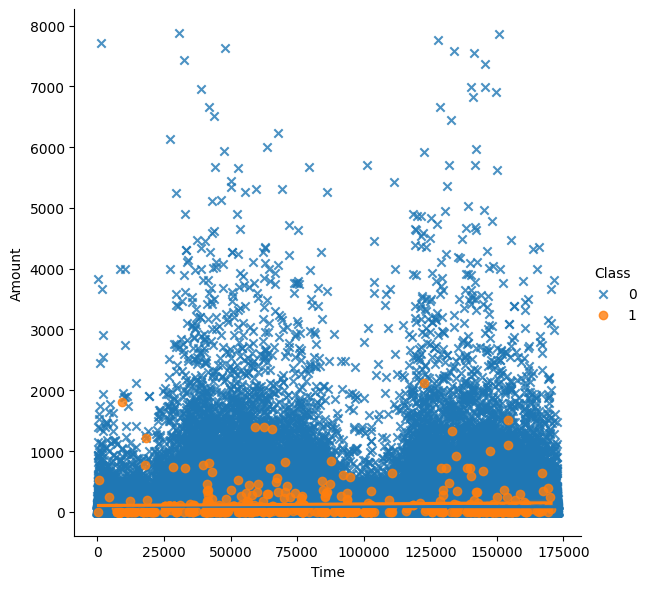

In [146]:
sns.lmplot(x='Time', y='Amount', hue='Class', markers=['x', 'o'], data=df_unique, height=6);

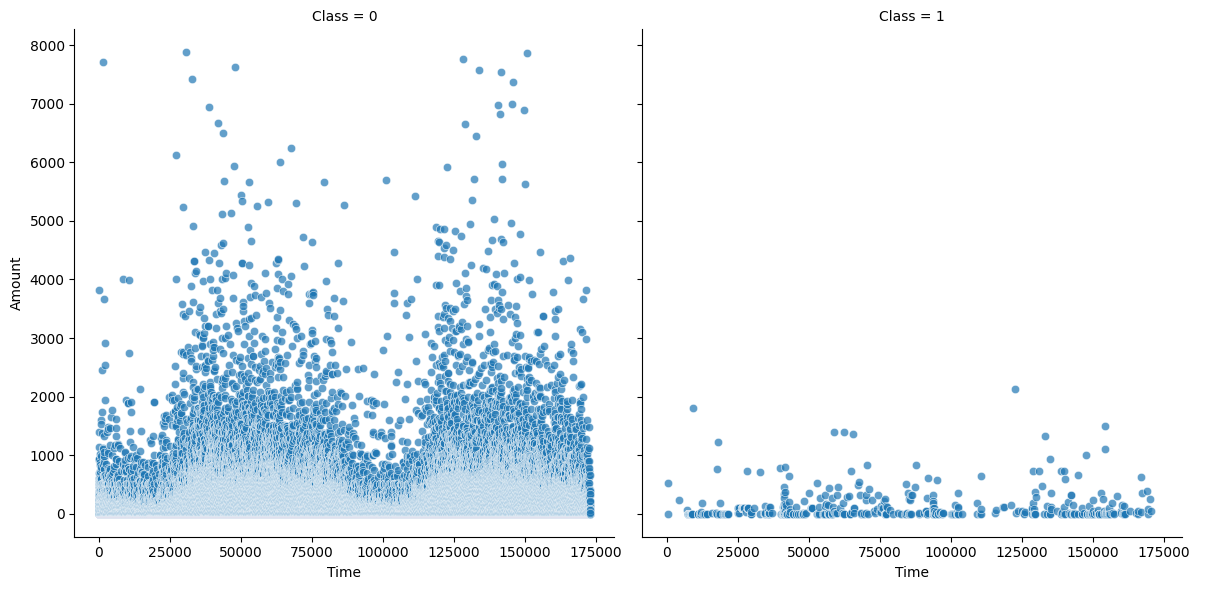

In [147]:
# plot relation in same scale
samescale = sns.FacetGrid(df_unique, col="Class", height=6)
samescale.map(sns.scatterplot, "Time", "Amount", alpha=.7)
samescale.add_legend();

In [148]:
# Creating fraudulent dataframe
data_fraud = df_unique[df_unique['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df_unique[df_unique['Class'] == 0]

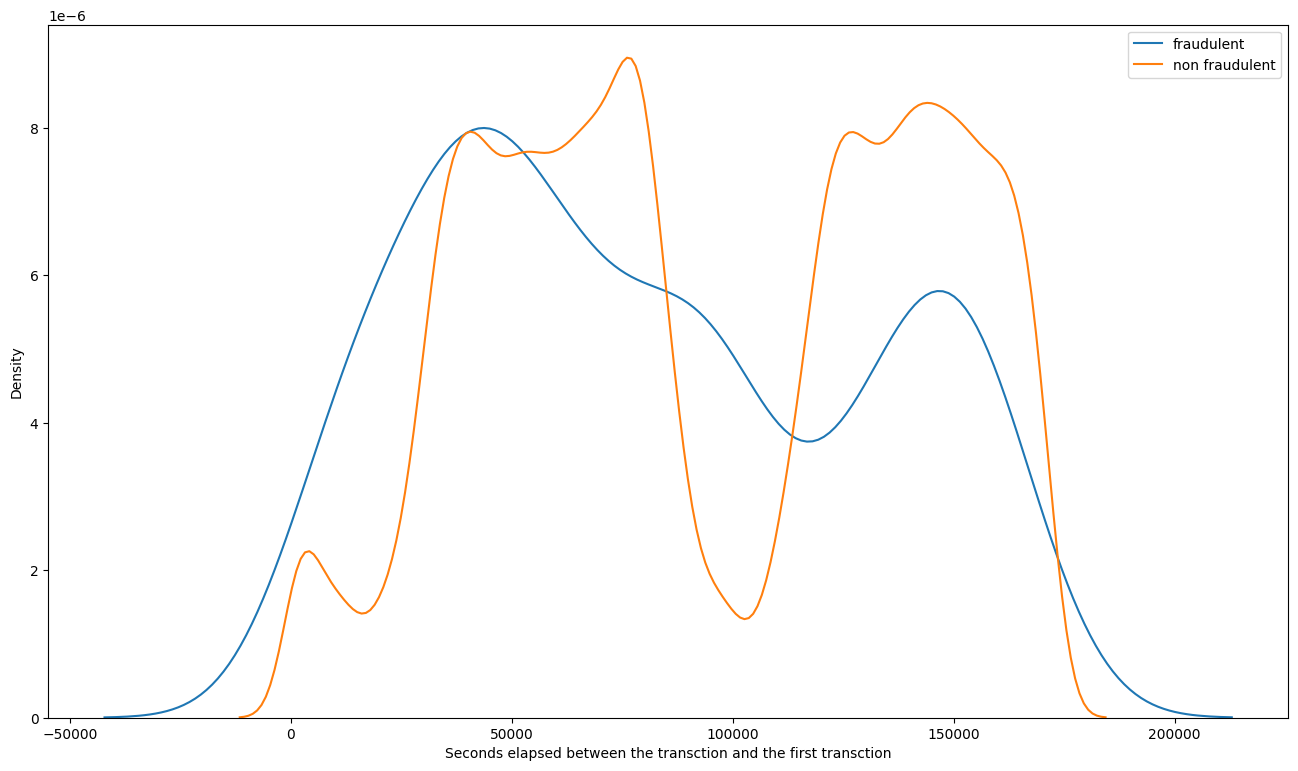

In [149]:
# Distribution plot
plt.figure(figsize=(16,9))
ax = sns.distplot(data_fraud['Time'], label='fraudulent', hist=False)
ax = sns.distplot(data_non_fraud['Time'], label='non fraudulent', hist=False)
ax.set(xlabel = 'Seconds elapsed between the transction and the first transction')
plt.legend()
plt.show();

**Observation:** We see no specific pattern for fraudulent transactions and non-fraudulent for 'Time'. 

### Train - Test Split

In [150]:
# Putting feature variables into X
X = df_unique.drop(['Class'], axis=1)

# Putting target variable to y
y = df_unique['Class']

In [151]:
# Import library
from sklearn.model_selection import train_test_split
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.8, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [152]:
X_train.shape, y_train.shape

((226971, 31), (226971,))

In [153]:
X_test.shape, y_test.shape

((56743, 31), (56743,))

### Feature Scaling
We need to scale the 'Amount' column because all the other columns have been PCA converted.

In [154]:
# Scale the 'Amount' column
scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [155]:
X_train.head()

Time         V1         V2        V3        V4        V5  \
217955  141107.0   0.871006   1.318798 -2.894956  0.039751  1.322494   
115040   73726.0  -1.490277   1.132335  0.560098  0.838959  0.290881   
241823  151204.0   1.766757  -0.074387  0.174380  3.542786 -0.125714   
42317    41052.0 -15.319964 -15.126137 -0.856656  3.192933  3.495020   
162779  115361.0  -1.528011  -1.111644  0.706332  5.054037 -1.013562   

              V6        V7        V8        V9  ...       V21       V22  \
217955 -0.855594 -0.120716 -2.928866 -0.734330  ... -1.263528  0.491226   
115040 -0.209488 -0.413048 -1.193000 -0.959234  ...  1.715674  0.017185   
241823  1.253379 -0.836521  0.425096 -0.264118  ...  0.061335  0.044837   
42317  -1.472074  1.447344 -1.839068  3.440986  ... -3.811951  1.141572   
162779  2.544815  1.615224  0.087533 -0.881589  ... -0.224550 -0.020360   

             V23       V24       V25       V26       V27       V28    Amount  \
217955 -0.024999  0.578421  0.619504  0.586328 -0.053281  0.149769 -0.373323   
115040 -0.257169  0.036778 -0.218060 -0.318310  0.277994 -0.088479 -0.325043   
241823  0.157497 -1.110835 -0.462992 -0.132981  0.012896 -0.032239 -0.116814   
42317   5.576888  0.003408  2.332782  1.099939 -2.814695  7.341635  0.220547   
162779  1.756065  0.207888 -1.108633  0.047967  0.558456  0.050635  1.958373   

        Time_hours  
217955   15.196389  
115040   20.479444  
241823   18.001111  
42317    11.403333  
162779    8.044722  

[5 rows x 31 columns]

In [156]:
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time_hours'],
      dtype='object')

In [157]:
#X_train = X_train.drop(['Amount_Scaled', 'Amount_Category'], axis=1)


In [158]:
#X_test = X_test.drop(['Amount_Scaled', 'Amount_Category'], axis=1)

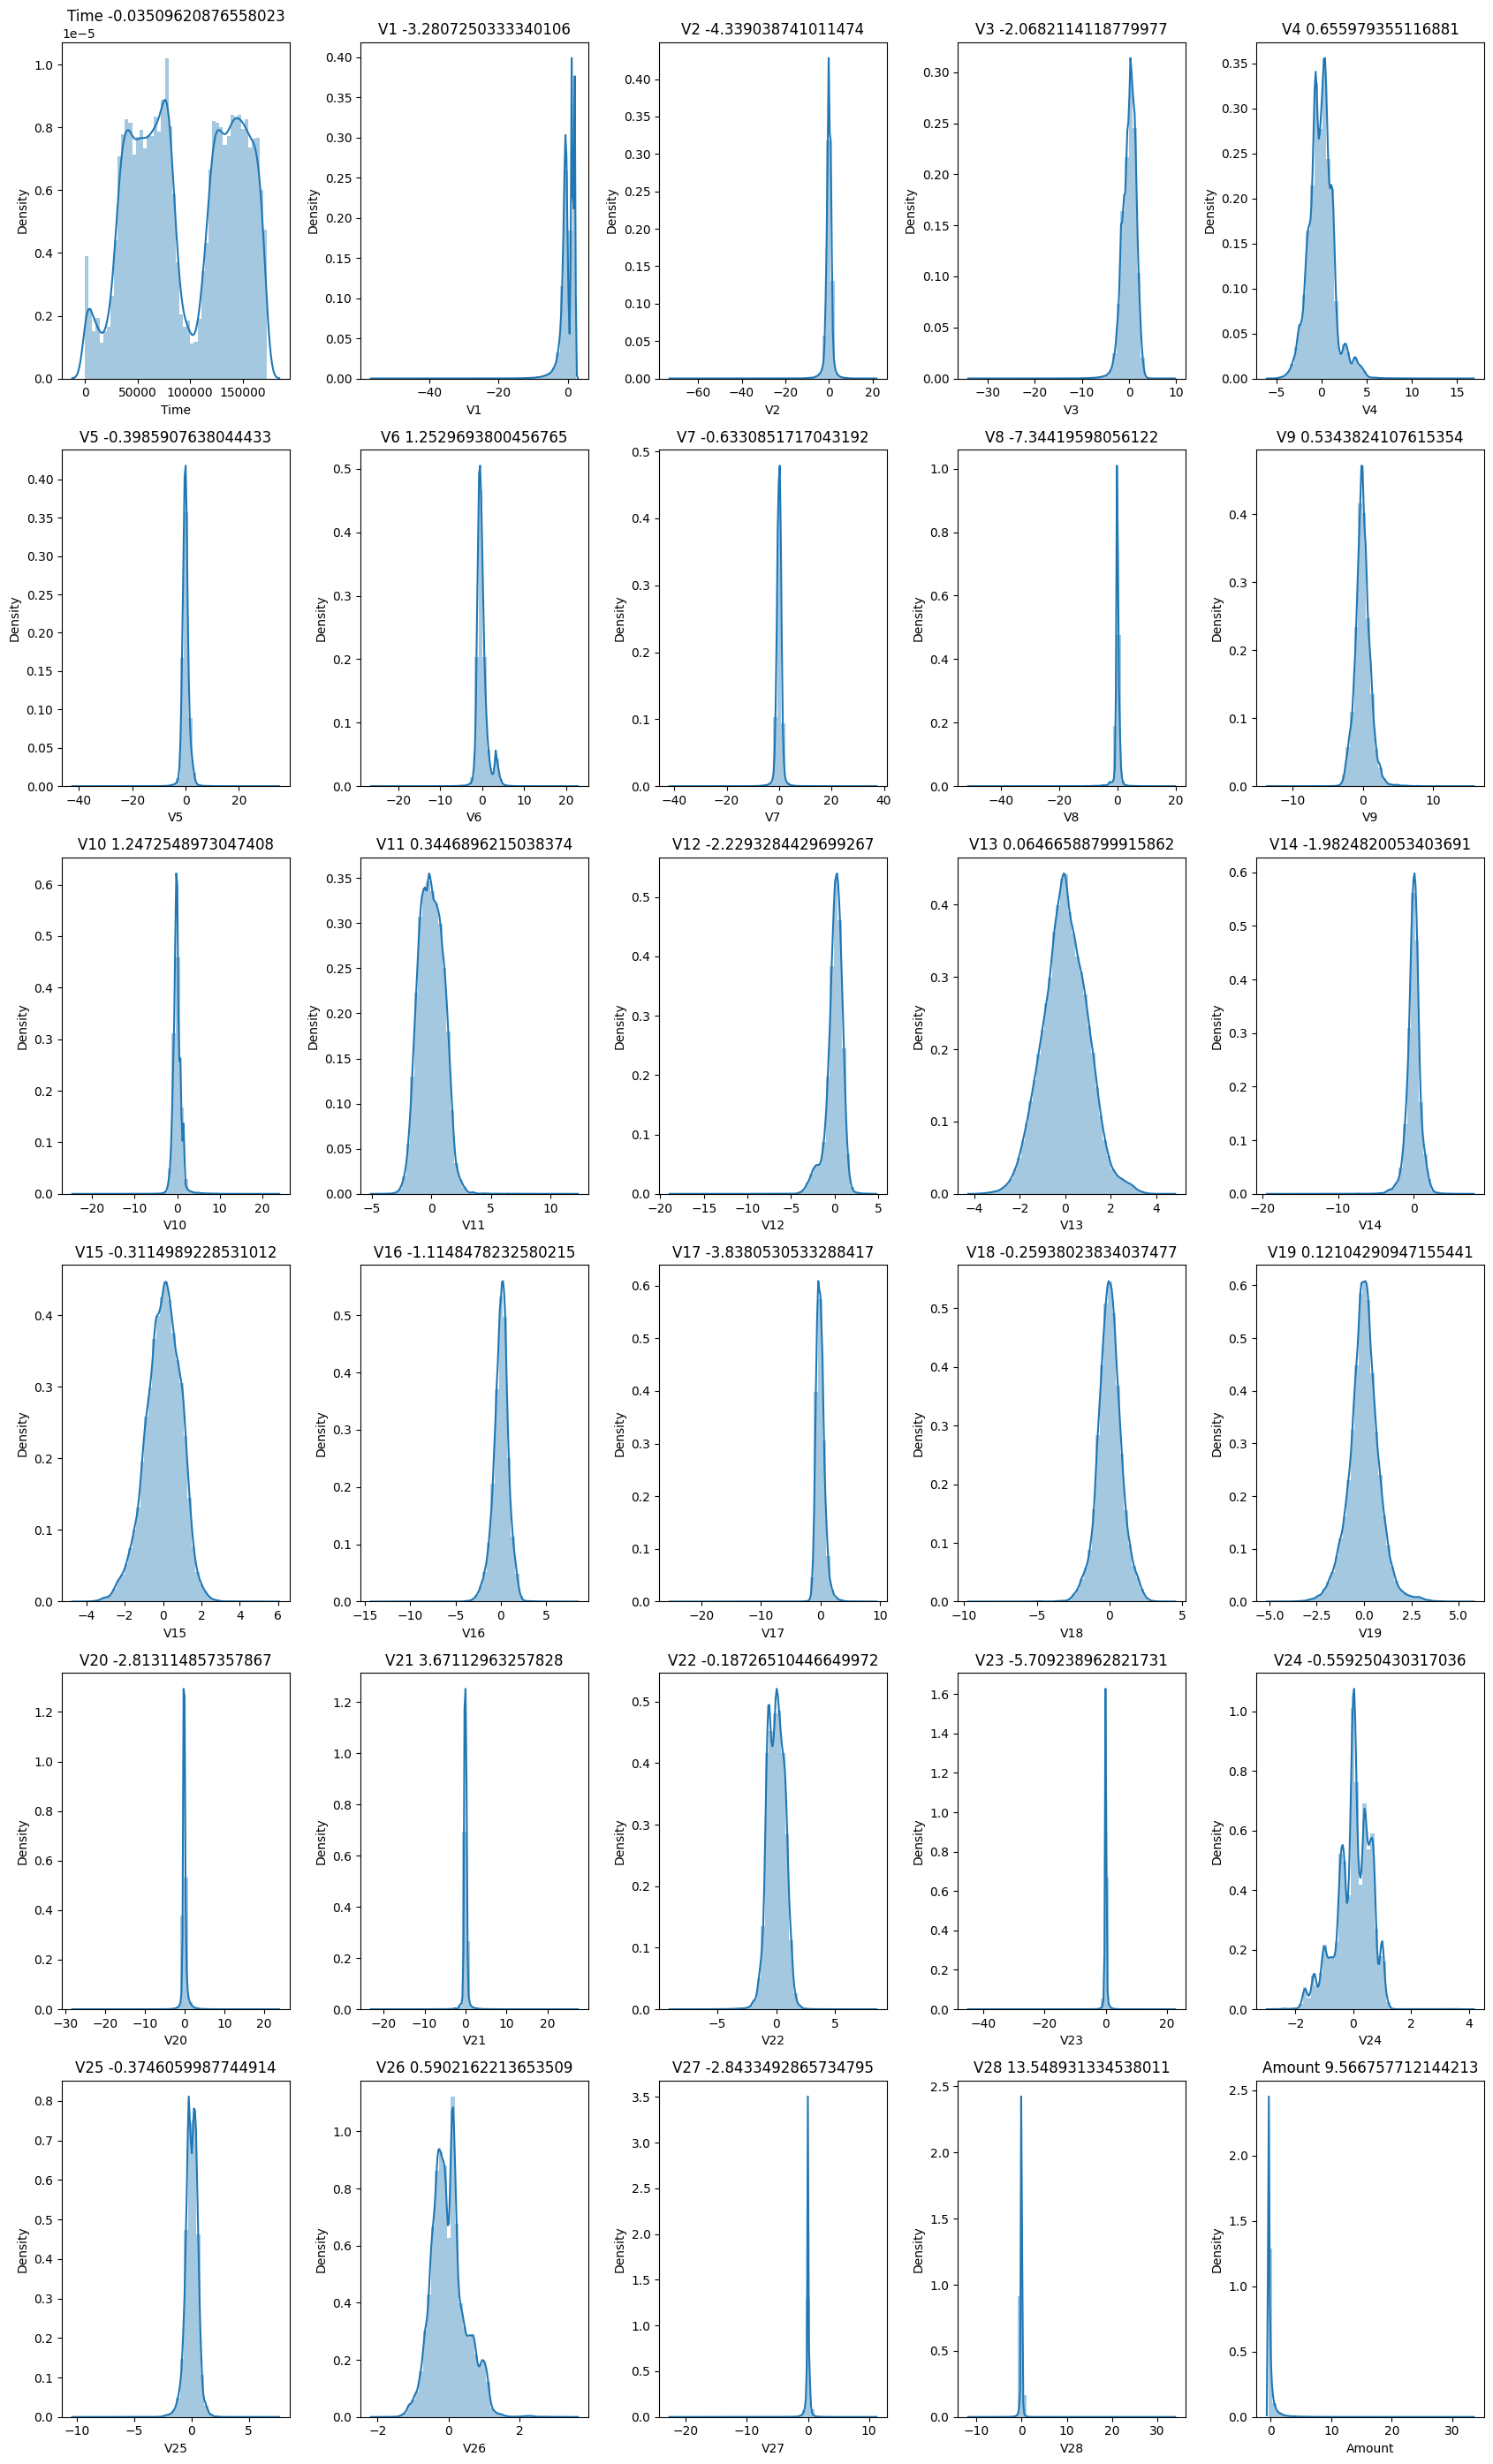

In [159]:
# Plotting the distribution of the variables (skewness) of all the columns
k = 0
plt.figure(figsize=(17, 28))
for col in cols:
    k = k + 1
    if k <= 30:  # Ensure we create only up to 30 subplots
        plt.subplot(6, 5, k)
        sns.distplot(X_train[col])
        plt.title(col + ' ' + str(X_train[col].skew()))

plt.tight_layout()  # Adjust layout to avoid overlapping titles
plt.show()

**Observation:** Looking at the graph, we see that there are many variables that are heavily skewed. Next, we'll minimize the bias for those variables to include them in the 'normal distribution'.

In [160]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [161]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

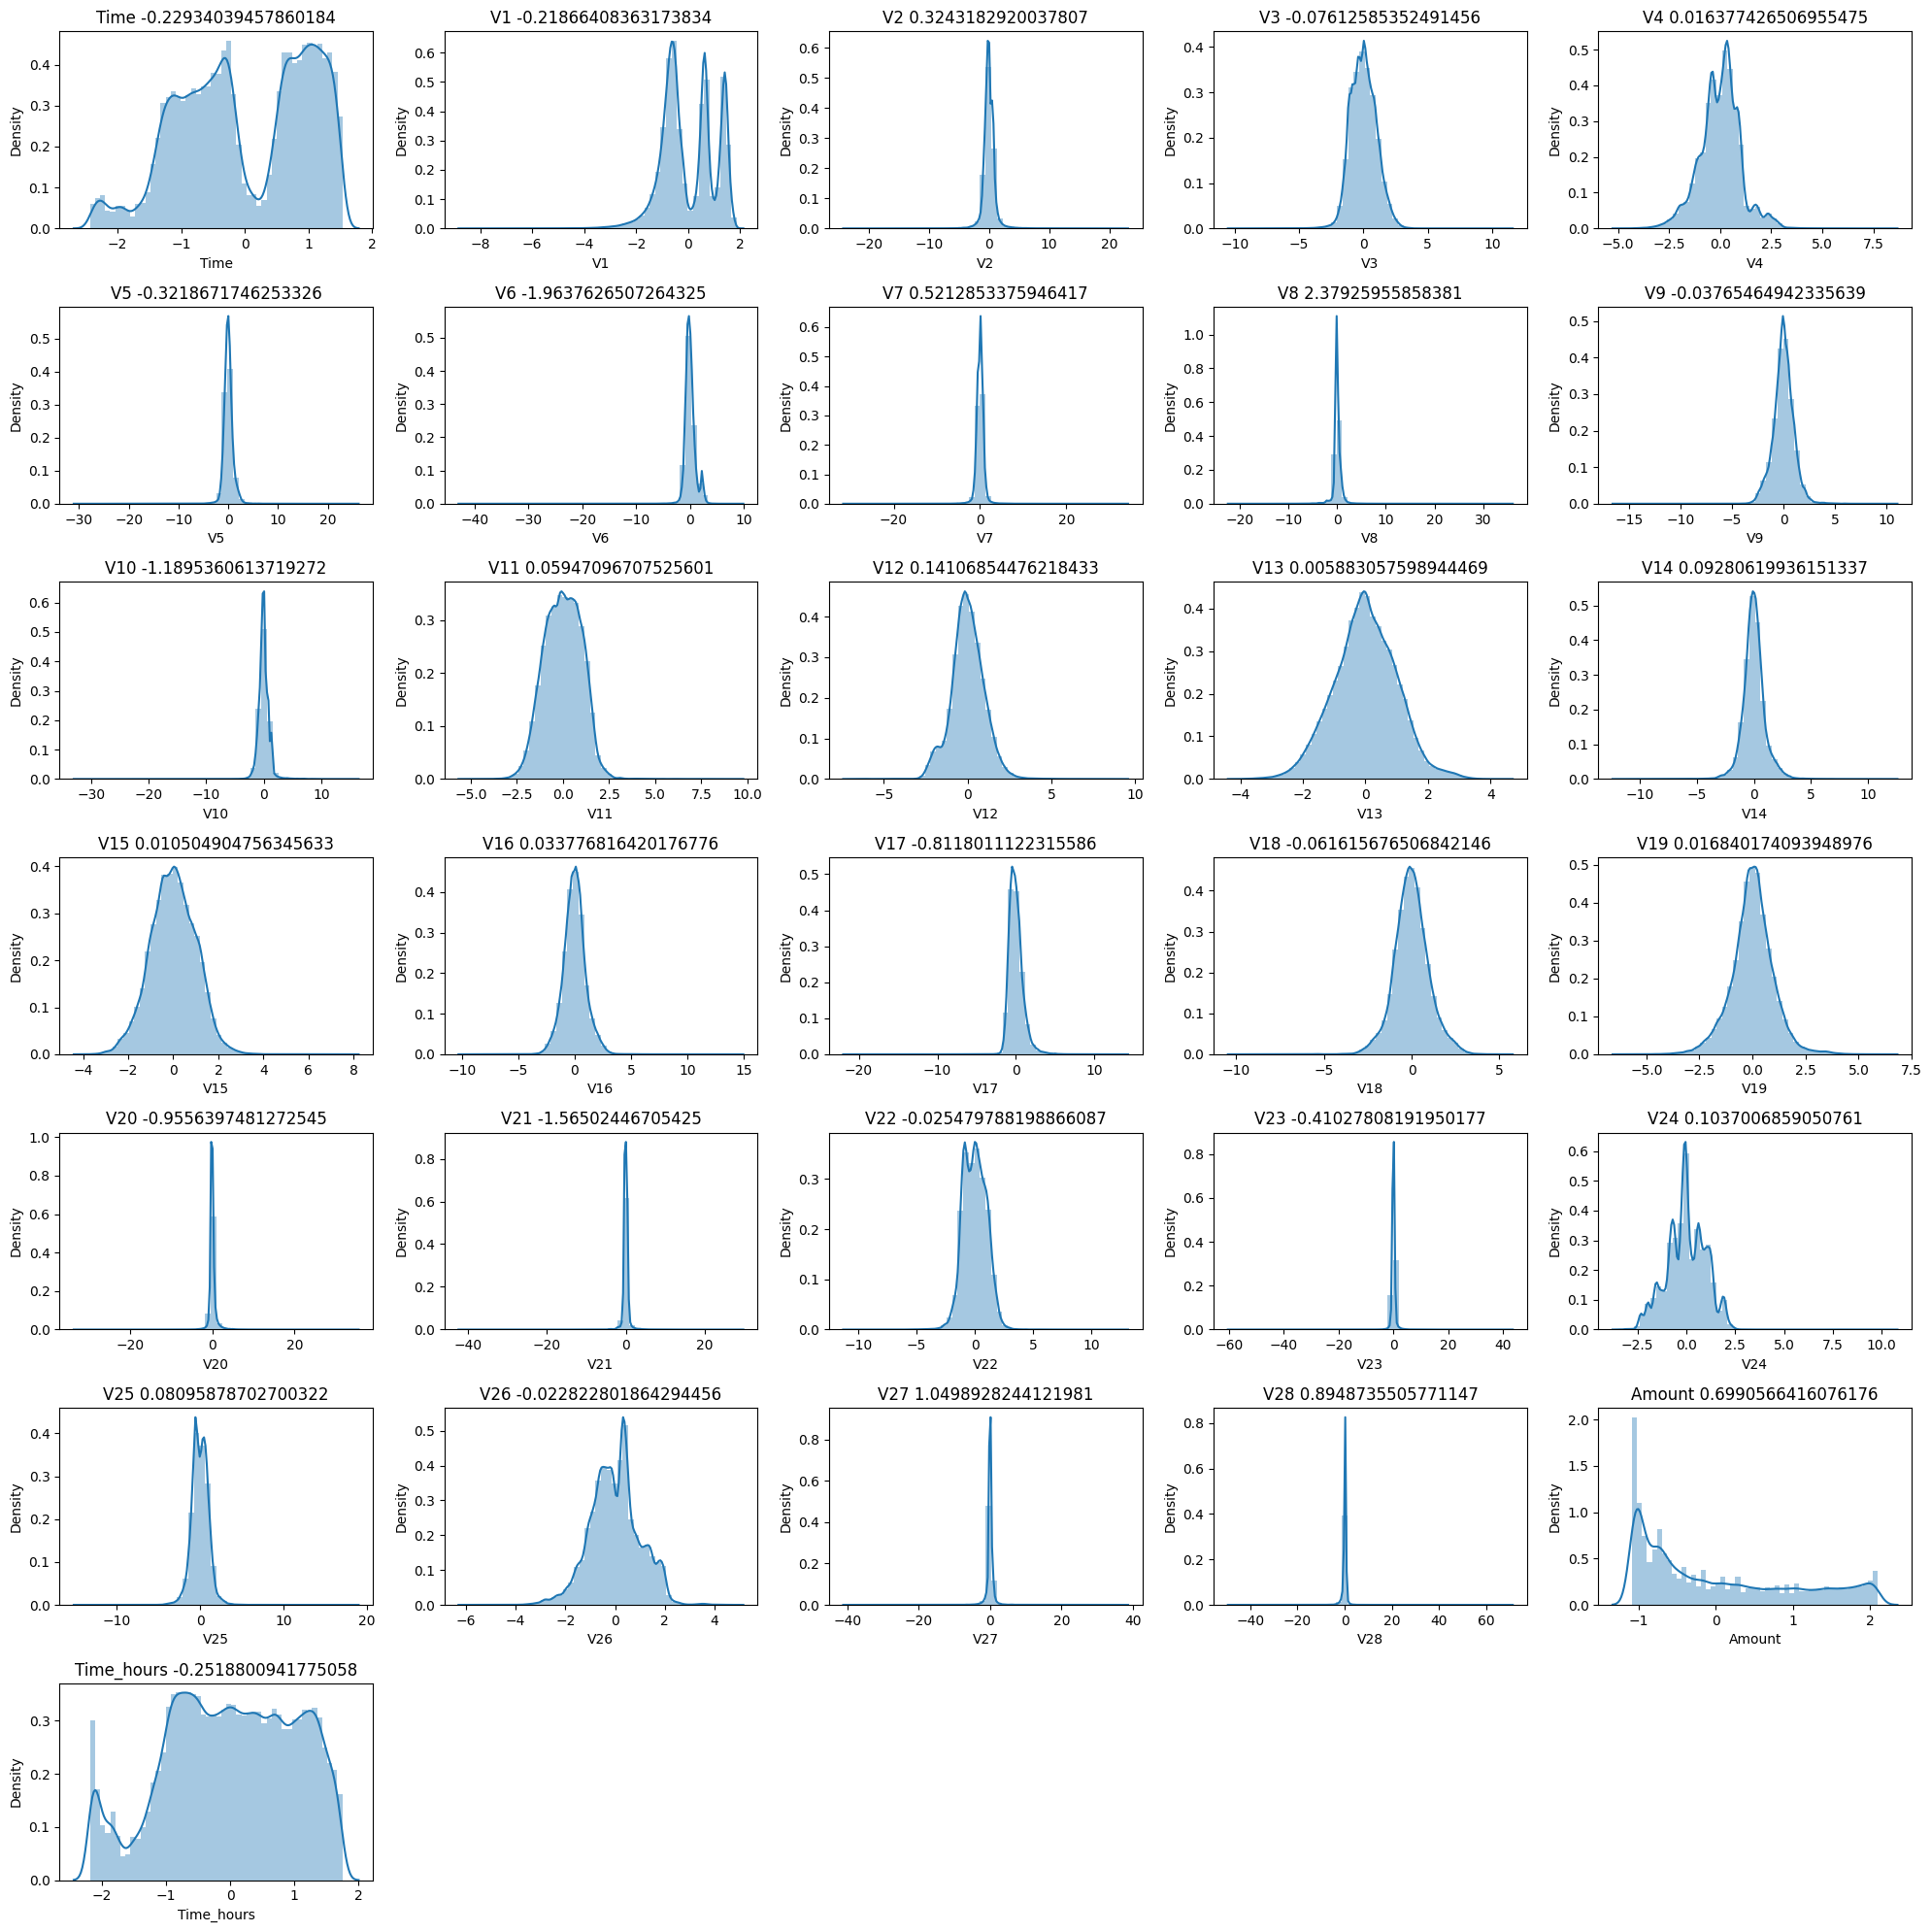

In [162]:
# Plotting the distribution of the variables (skewness) of all the columns
cols = X_train.columns
k = 0
plt.figure(figsize=(20,20))
for col in cols:    
    k += 1
    plt.subplot(7, 5, k)    
    sns.distplot(X_train[col])
    plt.title(col + ' ' + str(X_train[col].skew()))
plt.tight_layout()
plt.show()

**Observation:** Now we can see that all variables have a normal distribution after the transformation.

### Model  Building (Under Sampling)

In [163]:
! pip install imbalanced-learn
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [164]:
# instantiating the random undersampler 
random_undersampling = RandomUnderSampler()
# resampling X, y
X_train_random_undersample, y_train_random_undersample = random_undersampling.fit_resample(X_train, y_train)

In [165]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [166]:
def display_confusion_matrix_and_metrics(true_labels, predicted_labels):
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    # Visualization of the confusion matrix using a heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['Non-Fraudulent','Fraudulent'], 
                yticklabels=['Non-Fraudulent','Fraudulent'])
    plt.title(f'Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Printing classification report for further insights
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

In [167]:
def plot_roc_auc_curve(true_labels, probabilities):
    
    # Calculate the ROC curve points
    false_positive_rate, true_positive_rate, _ = roc_curve(true_labels, probabilities)
    
    # Calculate the AUC score
    auc_score = roc_auc_score(true_labels, probabilities)
    
    # Plot the ROC curve
    plt.figure(figsize=(16, 9))
    plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline (No Skill)')
    plt.plot(false_positive_rate, true_positive_rate, marker='.', label=f'Model (AUC = {auc_score:.3f})')
    
    # Configure plot aesthetics
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve and AUC Score')
    plt.legend()
    plt.show()

**1. Logistic Regression**

In [168]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_random_undersample, y_train_random_undersample)

# Predict on training and testing sets
train_predictions = logistic_model.predict(X_train_random_undersample)
test_predictions = logistic_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [169]:
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train_random_undersample, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train_random_undersample, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train_random_undersample, train_predictions):.4f}')

Recall Score: 0.9399
Precision Score: 0.9836
F1 Score: 0.9613
Accuracy Score: 0.9621
AUC Score: 0.9621


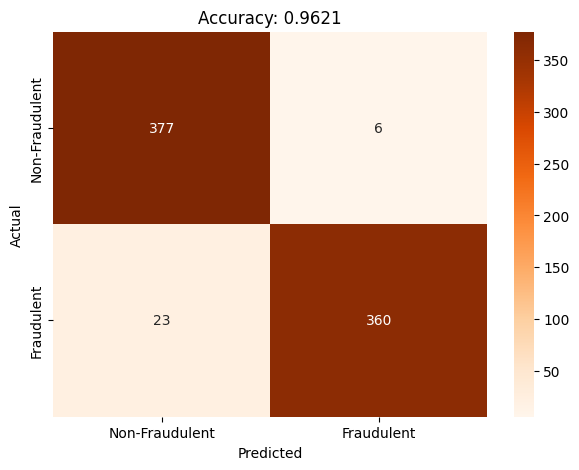


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       383
           1       0.98      0.94      0.96       383

    accuracy                           0.96       766
   macro avg       0.96      0.96      0.96       766
weighted avg       0.96      0.96      0.96       766



In [170]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_random_undersample, train_predictions)

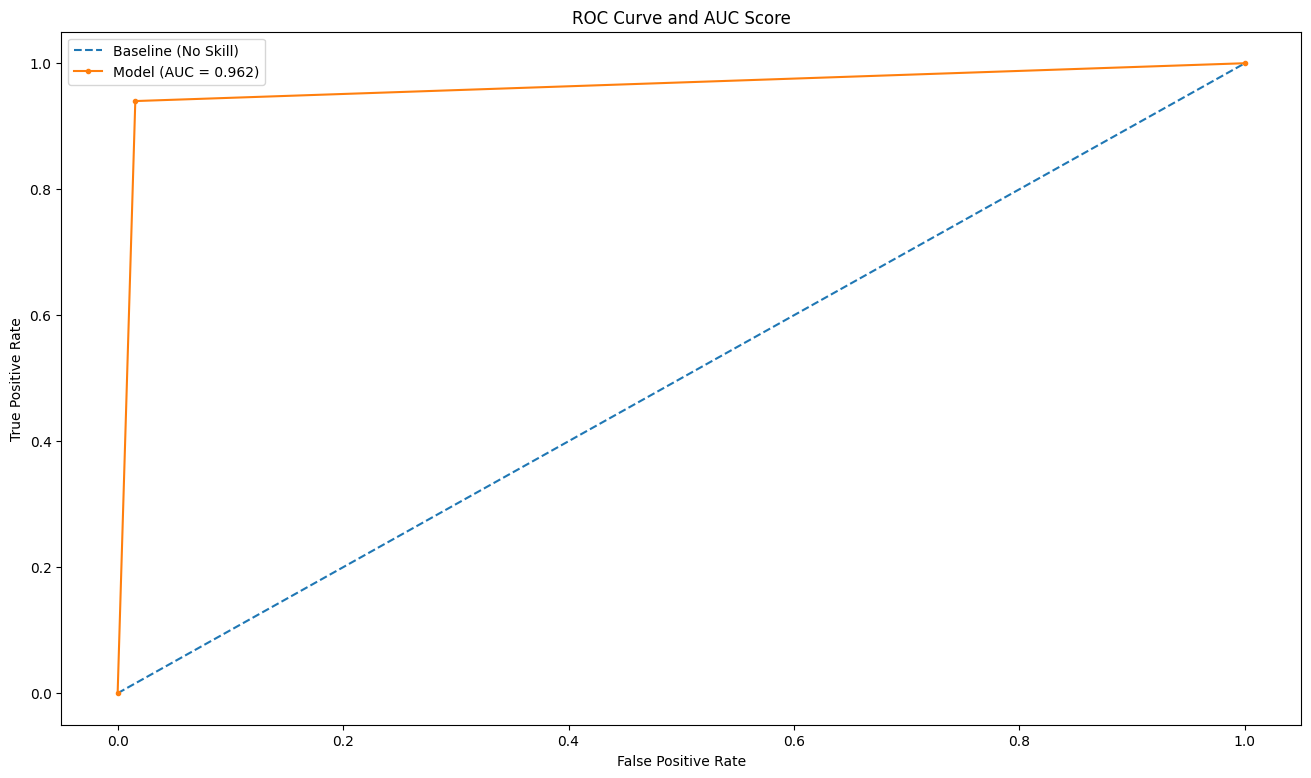

In [171]:
from sklearn.metrics import roc_curve
plot_roc_auc_curve(y_train_random_undersample, train_predictions)

Training Logistic Regression on Test Set

In [172]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.9000
Precision Score: 0.0282
F1 Score: 0.0547
Accuracy Score: 0.9507
AUC Score: 0.9254


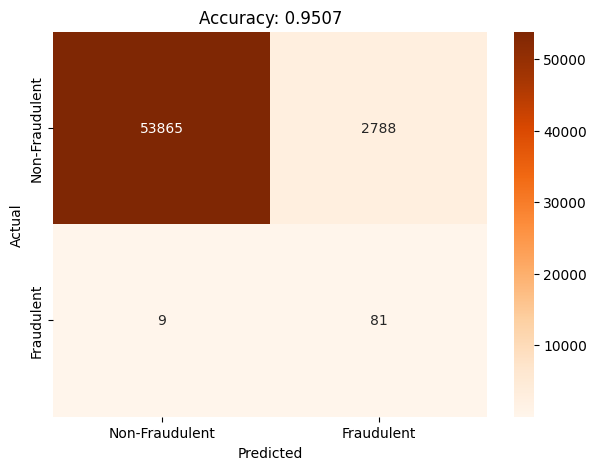


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56653
           1       0.03      0.90      0.05        90

    accuracy                           0.95     56743
   macro avg       0.51      0.93      0.51     56743
weighted avg       1.00      0.95      0.97     56743



In [173]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

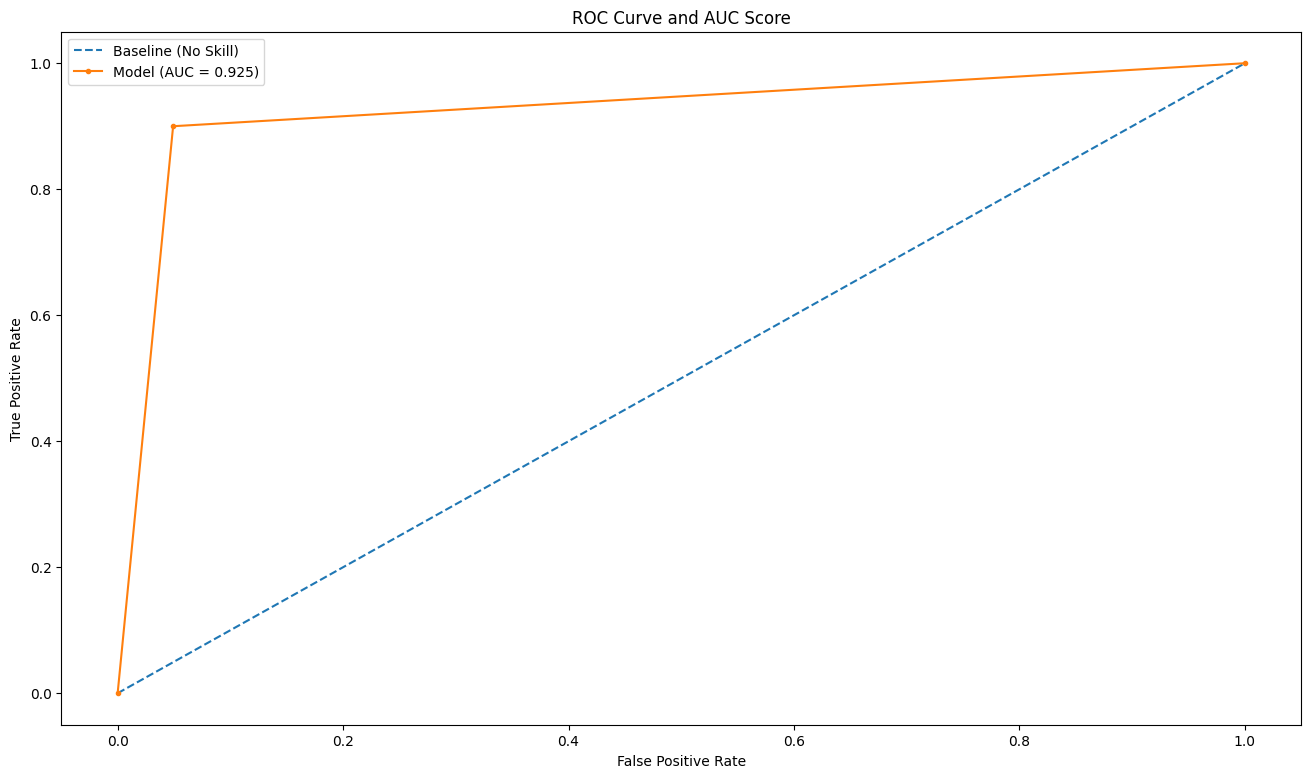

In [174]:
plot_roc_auc_curve(y_test, test_predictions)

**2. Naive Bayes**

In [175]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train_random_undersample, y_train_random_undersample)

# Make predictions using the trained model
train_predictions = gaussian_nb_model.predict(X_train_random_undersample)
test_predictions = gaussian_nb_model.predict(X_test)

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, test_predictions)



In [176]:
# Display evaluation metrics for the training dataset
print(f'Recall Score (Train): {recall_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Precision Score (Train): {precision_score(y_train_random_undersample, train_predictions):.4f}')
print(f'F1-Score (Train): {f1_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Accuracy Score (Train): {accuracy_score(y_train_random_undersample, train_predictions):.4f}')
print(f'AUC (Train): {roc_auc_score(y_train_random_undersample, train_predictions):.4f}')

Recall Score (Train): 0.8747
Precision Score (Train): 0.9626
F1-Score (Train): 0.9166
Accuracy Score (Train): 0.9204
AUC (Train): 0.9204


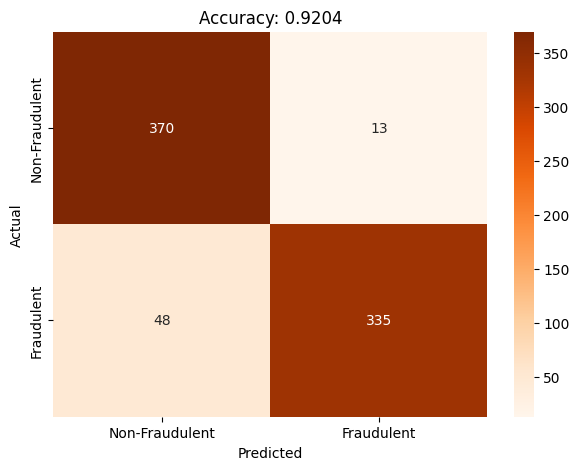


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       383
           1       0.96      0.87      0.92       383

    accuracy                           0.92       766
   macro avg       0.92      0.92      0.92       766
weighted avg       0.92      0.92      0.92       766



In [177]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_random_undersample, train_predictions)

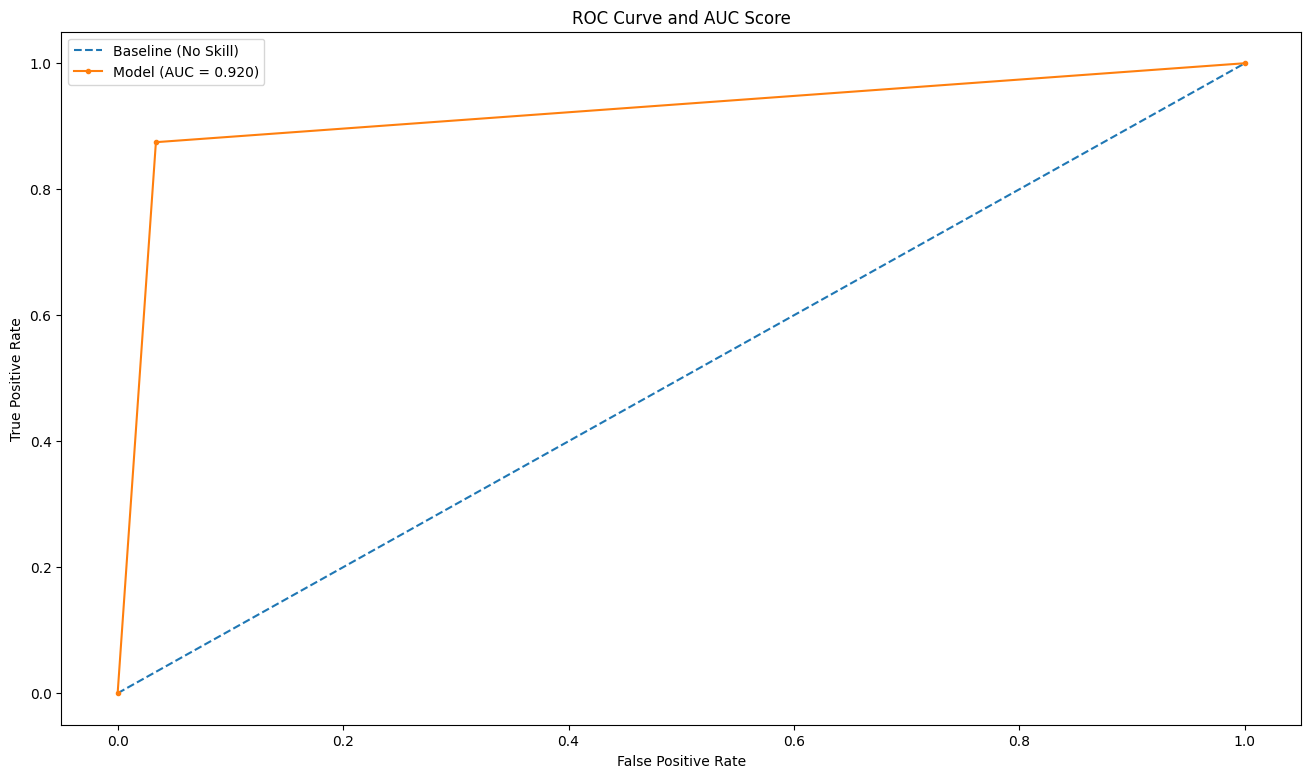

In [178]:
plot_roc_auc_curve(y_train_random_undersample, train_predictions)

Training Naive Bayes Model on Test Set

In [179]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.8222
Precision Score: 0.0337
F1 Score: 0.0647
Accuracy Score: 0.9623
AUC Score: 0.8924


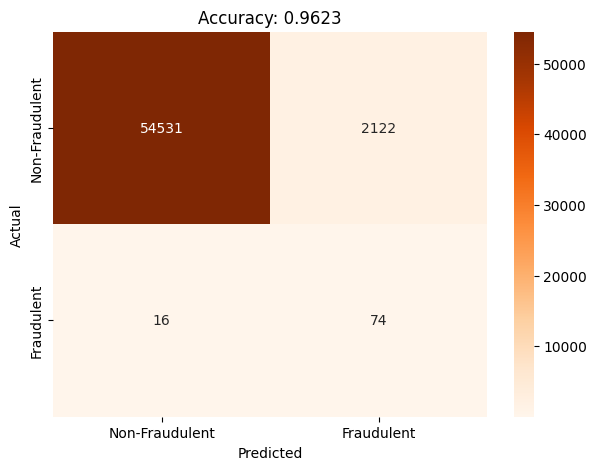


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56653
           1       0.03      0.82      0.06        90

    accuracy                           0.96     56743
   macro avg       0.52      0.89      0.52     56743
weighted avg       1.00      0.96      0.98     56743



In [180]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

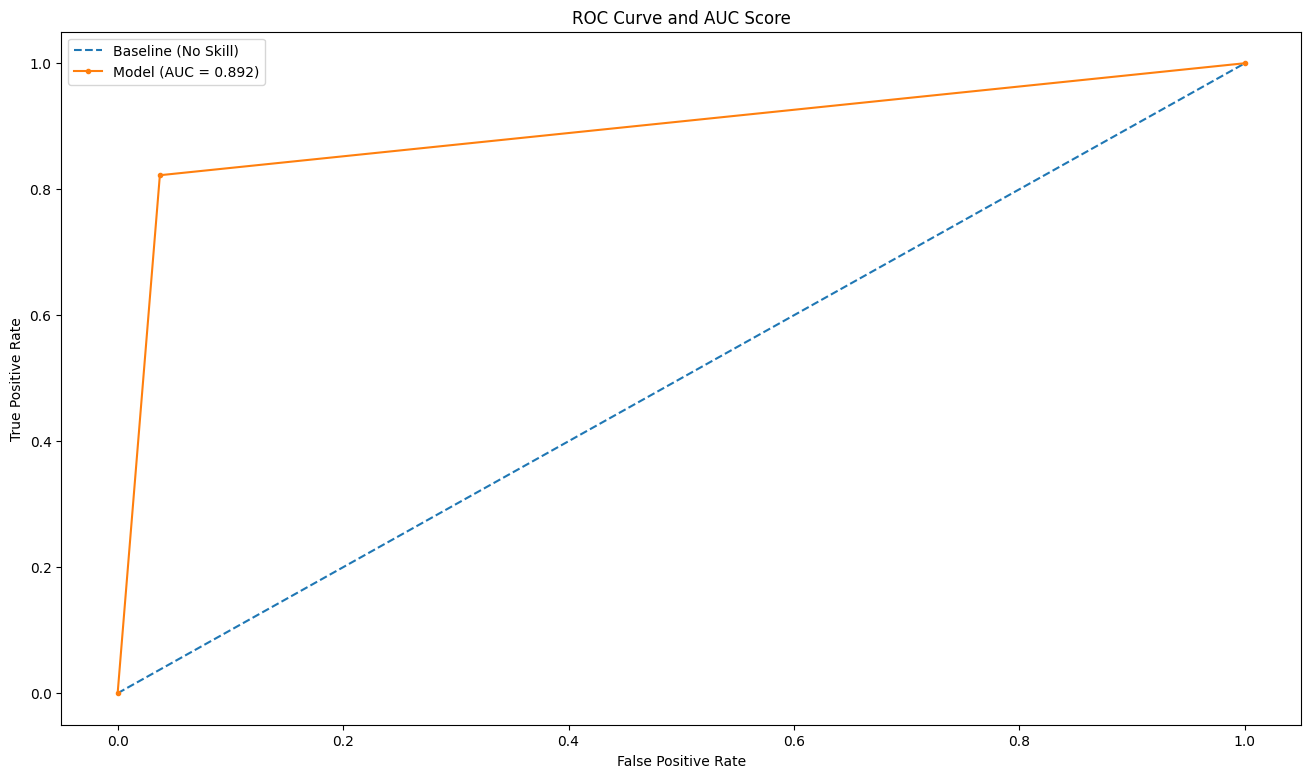

In [181]:
plot_roc_auc_curve(y_test, test_predictions)

3. KNN

In [182]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train_random_undersample, y_train_random_undersample)

# Make predictions using the trained model
train_predictions= KNN_model.predict(X_train_random_undersample)
test_predictions  = KNN_model.predict(X_test)

# Evaluate the model's performance
acc3 = accuracy_score(y_test, test_predictions)


In [183]:
# Train Score
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train_random_undersample, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train_random_undersample, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train_random_undersample, train_predictions):.4f}')

Recall Score: 0.9086
Precision Score: 0.9943
F1 Score: 0.9495
Accuracy Score: 0.9517
AUC Score: 0.9517


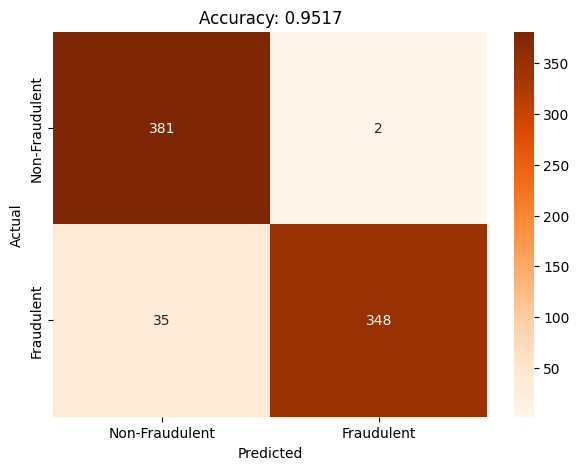


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       383
           1       0.99      0.91      0.95       383

    accuracy                           0.95       766
   macro avg       0.96      0.95      0.95       766
weighted avg       0.96      0.95      0.95       766



In [184]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_random_undersample, train_predictions)

Training KNN Model on Test Set

In [185]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.8556
Precision Score: 0.0519
F1 Score: 0.0978
Accuracy Score: 0.9750
AUC Score: 0.9154


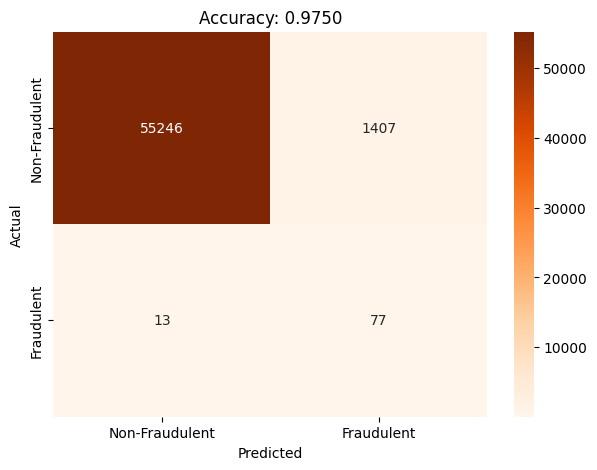


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56653
           1       0.05      0.86      0.10        90

    accuracy                           0.97     56743
   macro avg       0.53      0.92      0.54     56743
weighted avg       1.00      0.97      0.99     56743



In [186]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

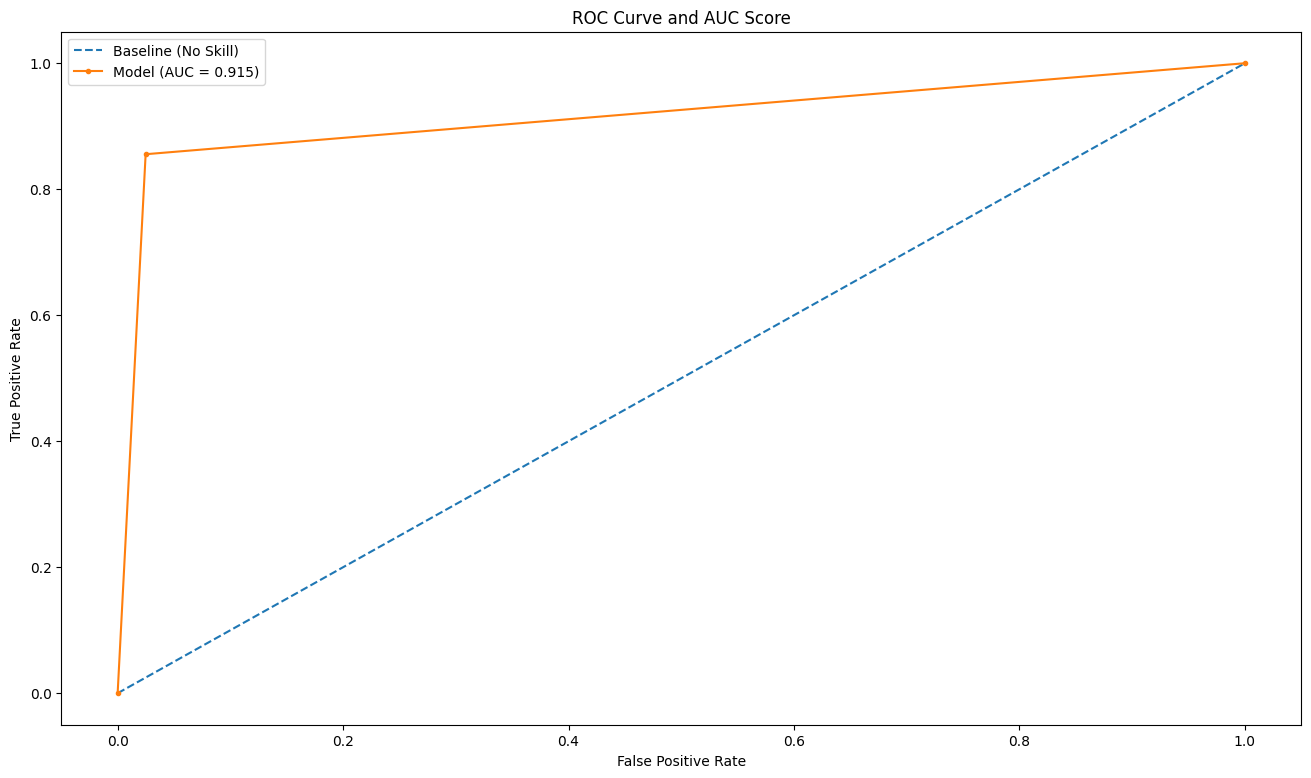

In [187]:
plot_roc_auc_curve(y_test, test_predictions)

4.Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train_random_undersample, y_train_random_undersample)

# Predict on training and testing sets
train_predictions = RF_model.predict(X_train_random_undersample)
test_predictions = RF_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [189]:
# Train Score
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train_random_undersample, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train_random_undersample, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train_random_undersample, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train_random_undersample, train_predictions):.4f}')

Recall Score: 0.9869
Precision Score: 1.0000
F1 Score: 0.9934
Accuracy Score: 0.9935
AUC Score: 0.9935


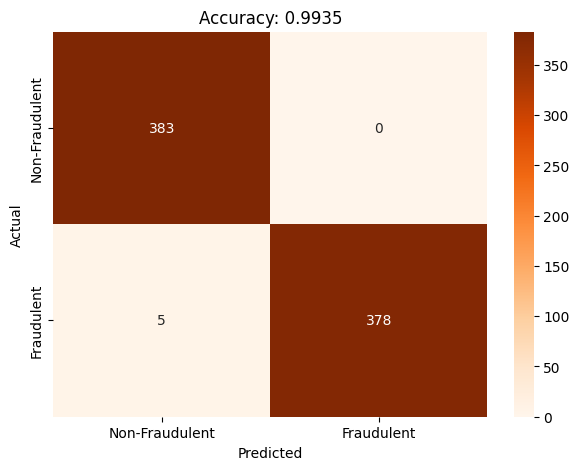


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       383
           1       1.00      0.99      0.99       383

    accuracy                           0.99       766
   macro avg       0.99      0.99      0.99       766
weighted avg       0.99      0.99      0.99       766



In [190]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_random_undersample, train_predictions)

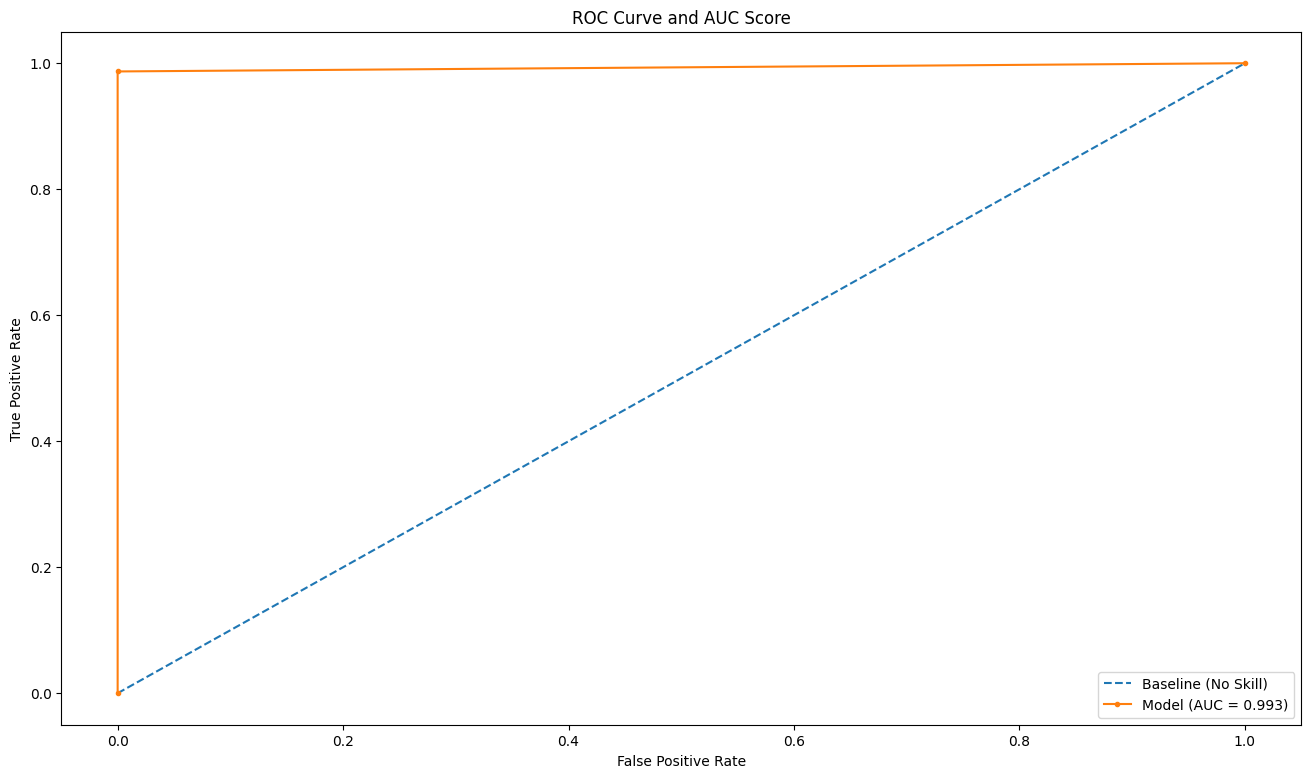

In [191]:
plot_roc_auc_curve(y_train_random_undersample, train_predictions)

Training Random Forest Model on Test Set

In [192]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.8778
Precision Score: 0.0458
F1 Score: 0.0871
Accuracy Score: 0.9708
AUC Score: 0.9244


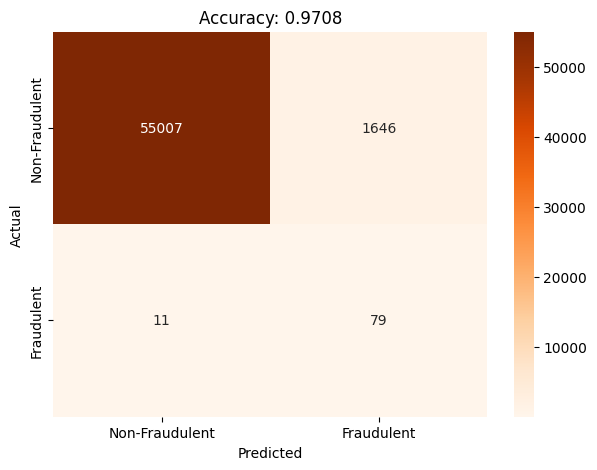


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56653
           1       0.05      0.88      0.09        90

    accuracy                           0.97     56743
   macro avg       0.52      0.92      0.54     56743
weighted avg       1.00      0.97      0.98     56743



In [193]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

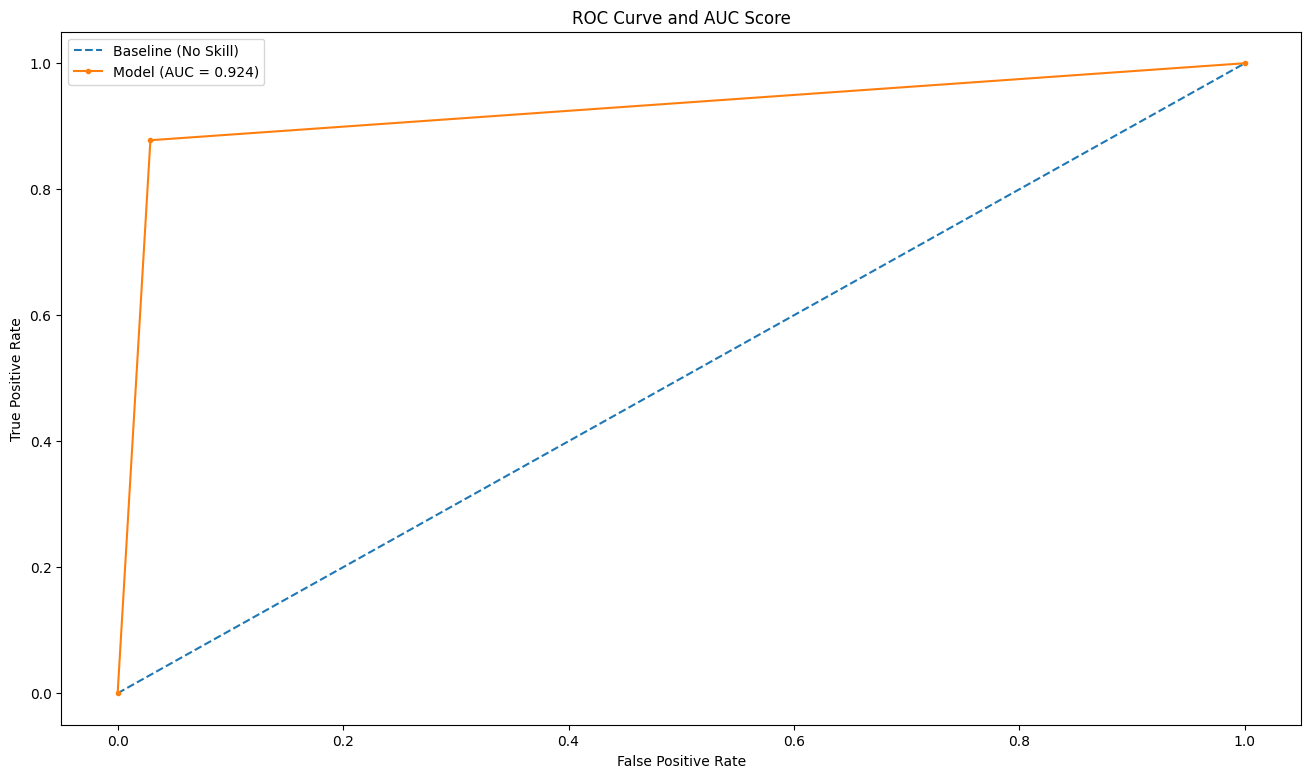

In [194]:
plot_roc_auc_curve(y_test, test_predictions)

5. AdaBoost


Training AdaBoost Model on Training set

In [195]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model_rus = AdaBoostClassifier()
adaboost_model_rus.fit(X_train_random_undersample, y_train_random_undersample)
y_train_pred = adaboost_model_rus.predict(X_train_random_undersample)
y_test_pred = adaboost_model_rus.predict(X_test)
acc_rus_6 = accuracy_score(y_test, y_test_pred)

In [196]:
# Train Score
print(f'Recall score:{recall_score(y_train_random_undersample, y_train_pred):.4f}')
print(f'Precision score:{precision_score(y_train_random_undersample, y_train_pred):.4f}')
print(f'F1-Score:{f1_score(y_train_random_undersample, y_train_pred):.4f}')
print(f'Accuracy score:{accuracy_score(y_train_random_undersample, y_train_pred):.4f}')
print(f'AUC:{roc_auc_score(y_train_random_undersample, y_train_pred):.4f}')

Recall score:0.9843
Precision score:0.9974
F1-Score:0.9908
Accuracy score:0.9909
AUC:0.9909


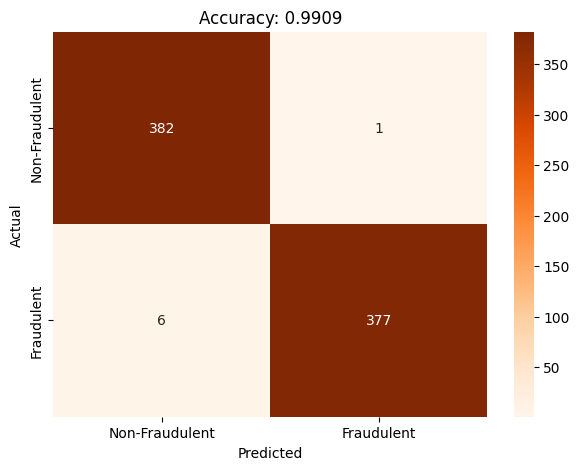


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       383
           1       1.00      0.98      0.99       383

    accuracy                           0.99       766
   macro avg       0.99      0.99      0.99       766
weighted avg       0.99      0.99      0.99       766



In [197]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_random_undersample, y_train_pred)

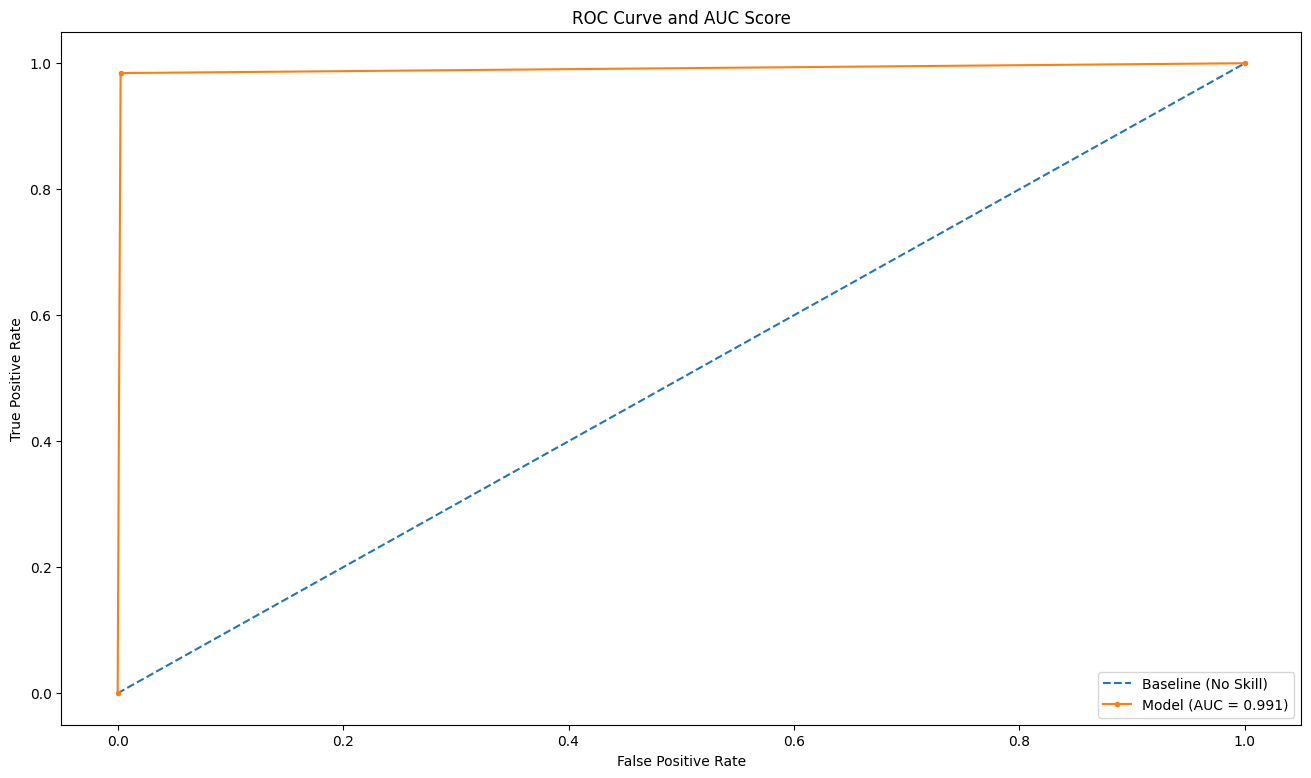

In [198]:
plot_roc_auc_curve(y_train_random_undersample, y_train_pred)

Training AdaBoost Model on Test set

In [199]:
print(f'Recall score:{recall_score(y_test, y_test_pred):.4f}')
print(f'Precision score:{precision_score(y_test, y_test_pred):.4f}')
print(f'F1-Score:{f1_score(y_test, y_test_pred):.4f}')
print(f'Accuracy score:{accuracy_score(y_test, y_test_pred):.4f}')
print(f'AUC:{roc_auc_score(y_test, y_test_pred):.4f}')

Recall score:0.9000
Precision score:0.0198
F1-Score:0.0388
Accuracy score:0.9292
AUC:0.9146


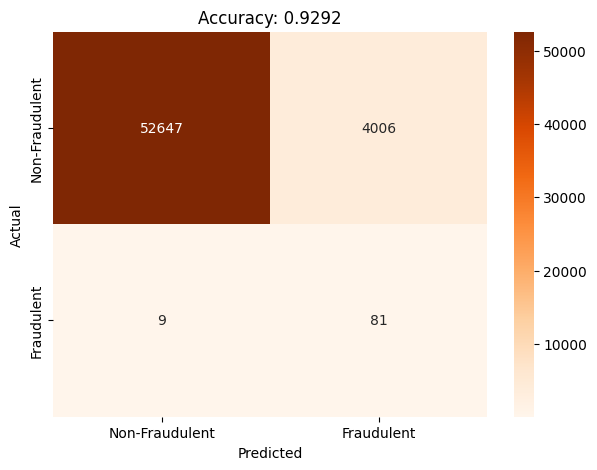


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56653
           1       0.02      0.90      0.04        90

    accuracy                           0.93     56743
   macro avg       0.51      0.91      0.50     56743
weighted avg       1.00      0.93      0.96     56743



In [200]:
# Test Predictions
display_confusion_matrix_and_metrics(y_test, y_test_pred)

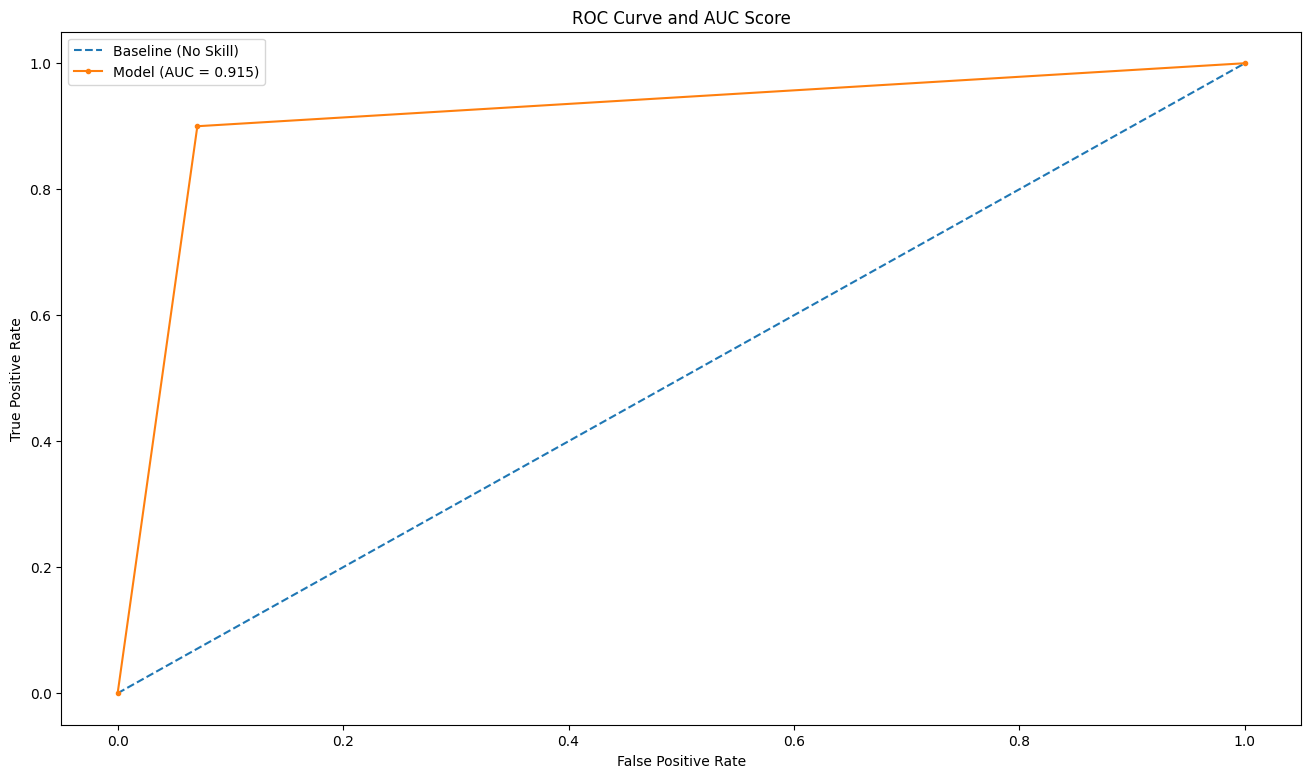

In [201]:
plot_roc_auc_curve(y_test, y_test_pred)

6. LightGBM

Training LightGBM Model on Training set

In [202]:
from lightgbm import LGBMClassifier
LGB_model_rus = LGBMClassifier()
LGB_model_rus.fit(X_train_random_undersample, y_train_random_undersample)
y_train_pred = LGB_model_rus.predict(X_train_random_undersample)
y_test_pred = LGB_model_rus.predict(X_test)
acc_rus_8 = accuracy_score(y_test, y_test_pred)

[LightGBM] [Info] Number of positive: 383, number of negative: 383
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7896
[LightGBM] [Info] Number of data points in the train set: 766, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [203]:
# Train Score
print(f'Recall score:{recall_score(y_train_random_undersample, y_train_pred):.4f}')
print(f'Precision score:{precision_score(y_train_random_undersample, y_train_pred):.4f}')
print(f'F1-Score:{f1_score(y_train_random_undersample, y_train_pred):.4f}')
print(f'Accuracy score:{accuracy_score(y_train_random_undersample, y_train_pred):.4f}')
print(f'AUC:{roc_auc_score(y_train_random_undersample, y_train_pred):.4f}')

Recall score:1.0000
Precision score:1.0000
F1-Score:1.0000
Accuracy score:1.0000
AUC:1.0000


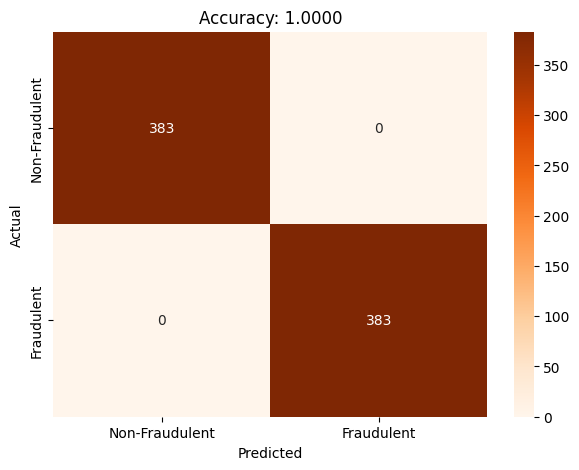


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       383
           1       1.00      1.00      1.00       383

    accuracy                           1.00       766
   macro avg       1.00      1.00      1.00       766
weighted avg       1.00      1.00      1.00       766



In [204]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_random_undersample, y_train_pred)

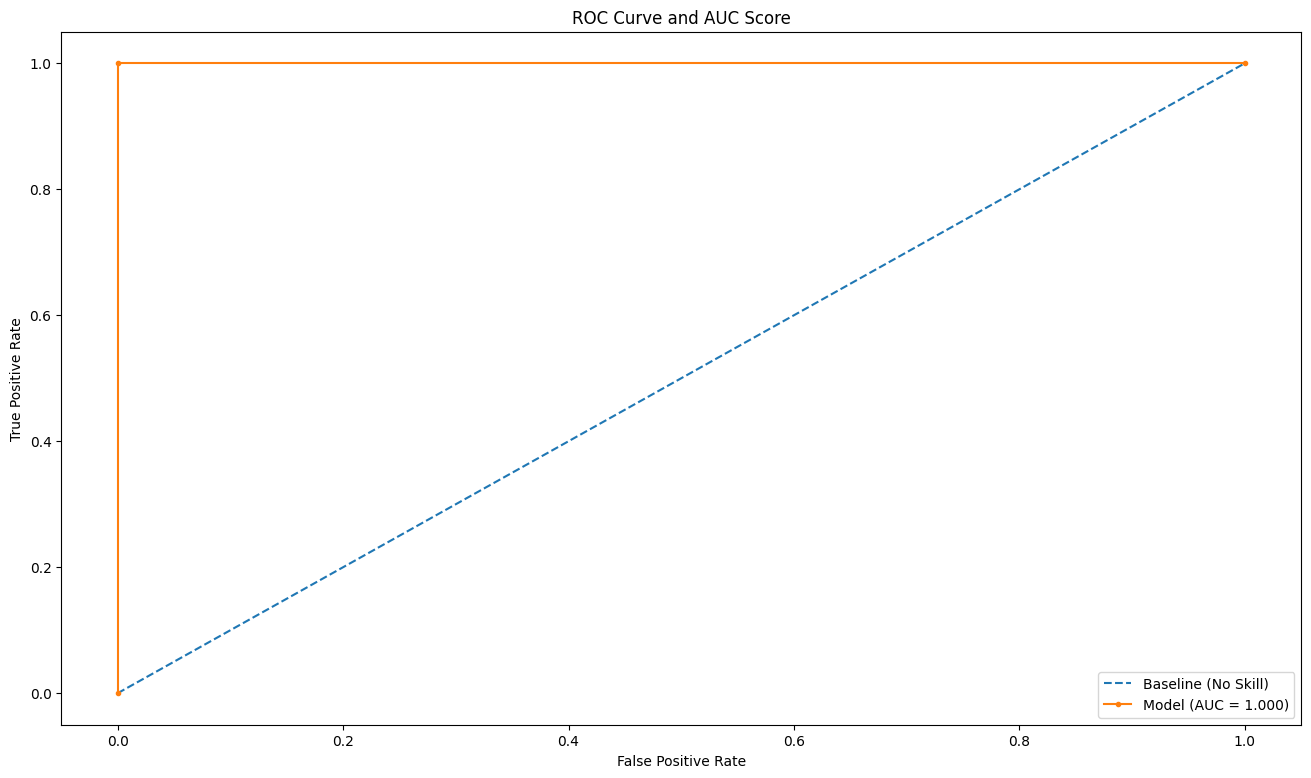

In [205]:
plot_roc_auc_curve(y_train_random_undersample, y_train_pred)

Training LightGBM Model on Test set

In [206]:
# Test score
print(f'Recall score:{recall_score(y_test, y_test_pred):.4f}')
print(f'Precision score:{precision_score(y_test, y_test_pred):.4f}')
print(f'F1-Score:{f1_score(y_test, y_test_pred):.4f}')
print(f'Accuracy score:{accuracy_score(y_test, y_test_pred):.4f}')
print(f'AUC:{roc_auc_score(y_test, y_test_pred):.4f}')

Recall score:0.9222
Precision score:0.0394
F1-Score:0.0755
Accuracy score:0.9642
AUC:0.9432


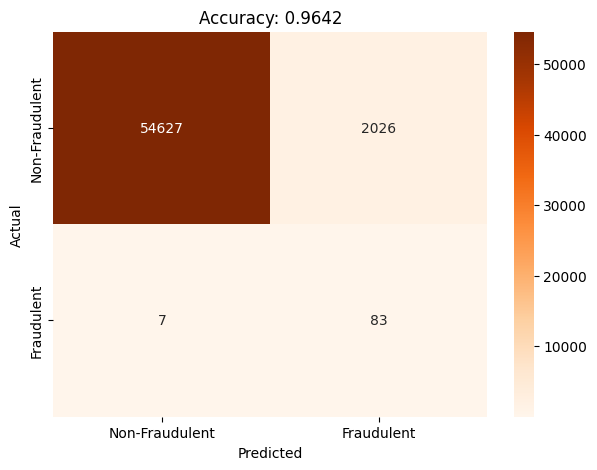


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56653
           1       0.04      0.92      0.08        90

    accuracy                           0.96     56743
   macro avg       0.52      0.94      0.53     56743
weighted avg       1.00      0.96      0.98     56743



In [207]:
# Test Predictions
display_confusion_matrix_and_metrics(y_test, y_test_pred)

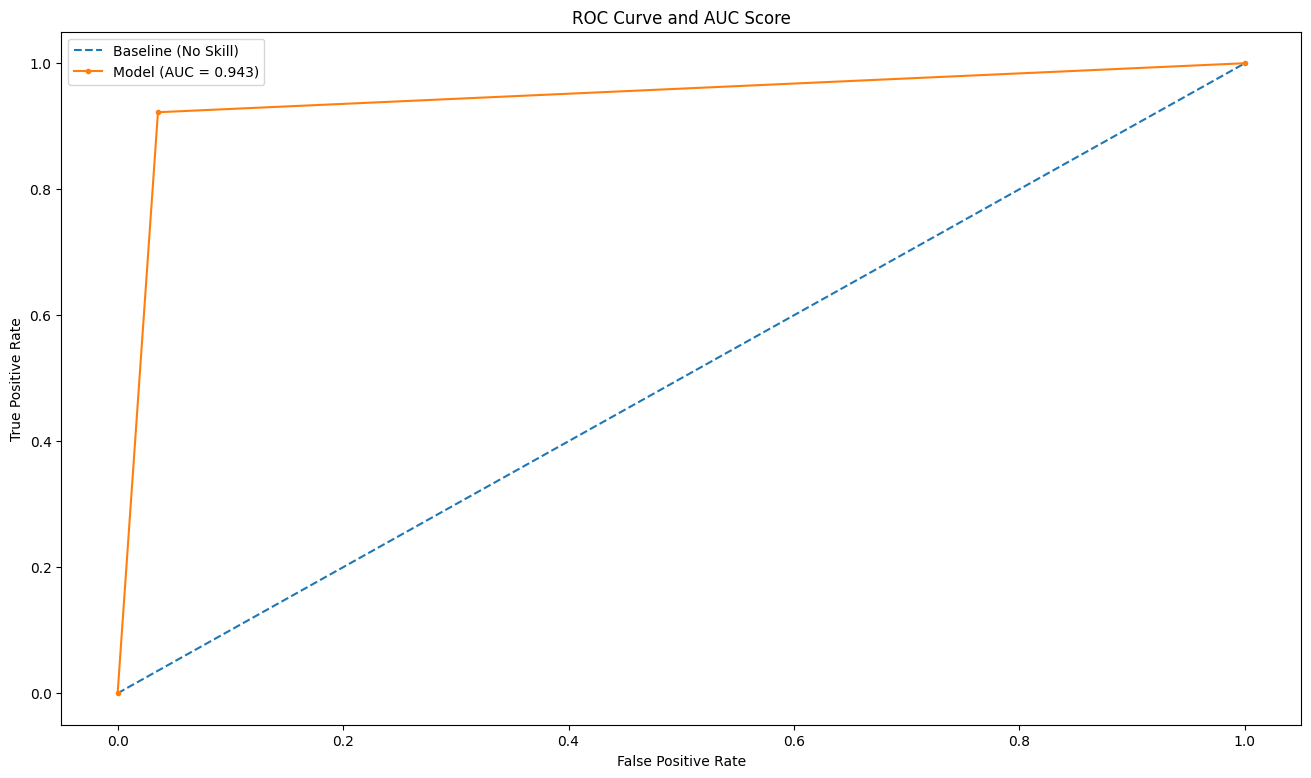

In [208]:
plot_roc_auc_curve(y_test, y_test_pred)

### Model  Building (Over Sampling)

In [209]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [210]:
# instantiating the random oversampler 
random_oversampling = RandomOverSampler()
# resampling X, y
X_train_random_oversample, y_train_randomoversample = random_oversampling.fit_resample(X_train, y_train)

In [211]:
# Befor sampling class distribution
print('Before sampling class distribution:', Counter(y_train))
# new class distribution
print('New class distribution:', Counter(y_train_randomoversample))

Before sampling class distribution: Counter({0: 226588, 1: 383})
New class distribution: Counter({0: 226588, 1: 226588})


**1. Logistic Regression**

In [212]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_random_oversample, y_train_randomoversample)

# Predict on training and testing sets
train_predictions = logistic_model.predict(X_train_random_oversample)
test_predictions = logistic_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [213]:
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train_randomoversample, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train_randomoversample, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train_randomoversample, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train_randomoversample, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train_randomoversample, train_predictions):.4f}')

Recall Score: 0.9337
Precision Score: 0.9746
F1 Score: 0.9537
Accuracy Score: 0.9547
AUC Score: 0.9547


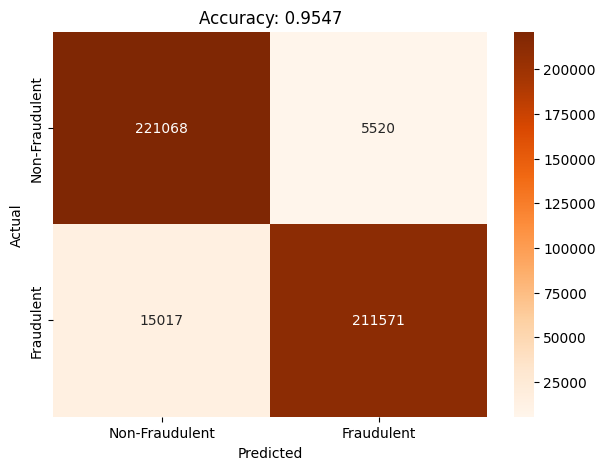


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    226588
           1       0.97      0.93      0.95    226588

    accuracy                           0.95    453176
   macro avg       0.96      0.95      0.95    453176
weighted avg       0.96      0.95      0.95    453176



In [214]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_randomoversample, train_predictions)

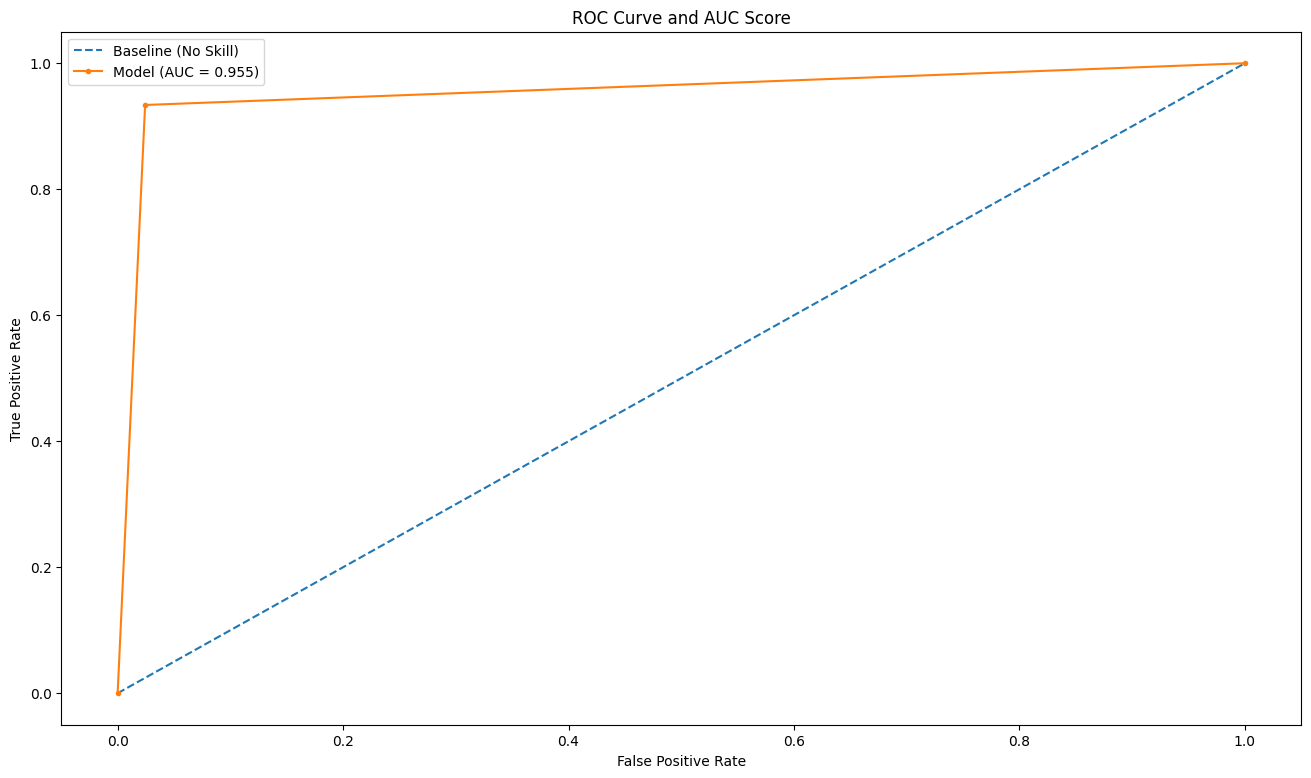

In [215]:
plot_roc_auc_curve(y_train_randomoversample, train_predictions)

Training Logistic Regression on Test Set

In [216]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.9000
Precision Score: 0.0400
F1 Score: 0.0766
Accuracy Score: 0.9656
AUC Score: 0.9328


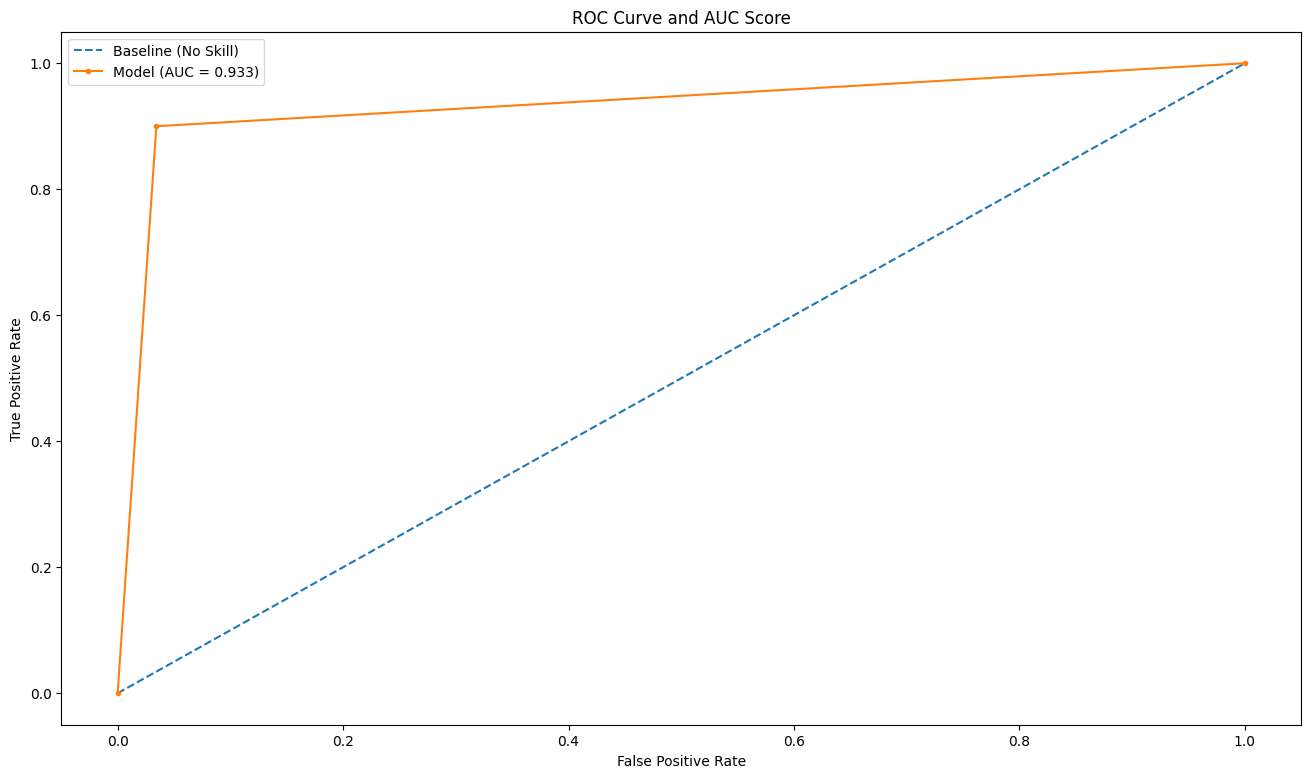

In [217]:
plot_roc_auc_curve(y_test, test_predictions)

**2. Naive Bayes**

In [218]:
gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train_random_oversample, y_train_randomoversample)

# Make predictions using the trained model
train_predictions = gaussian_nb_model.predict(X_train_random_oversample)
test_predictions = gaussian_nb_model.predict(X_test)

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, test_predictions)


In [219]:
# Train Score
print('Recall score: %0.4f'% recall_score(y_train_randomoversample, train_predictions))
print('Precision score: %0.4f'% precision_score(y_train_randomoversample, train_predictions))
print('F1-Score: %0.4f'% f1_score(y_train_randomoversample, train_predictions))
print('Accuracy score: %0.4f'% accuracy_score(y_train_randomoversample, train_predictions))
print('AUC: %0.4f' % roc_auc_score(y_train_randomoversample, train_predictions))

Recall score: 0.8671
Precision score: 0.9702
F1-Score: 0.9158
Accuracy score: 0.9202
AUC: 0.9202


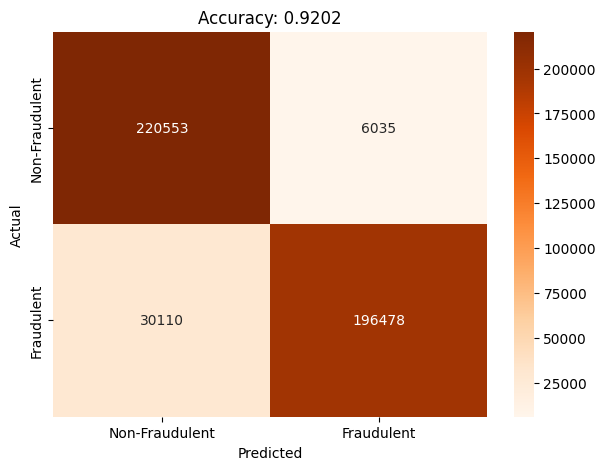


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92    226588
           1       0.97      0.87      0.92    226588

    accuracy                           0.92    453176
   macro avg       0.93      0.92      0.92    453176
weighted avg       0.93      0.92      0.92    453176



In [220]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_randomoversample, train_predictions)

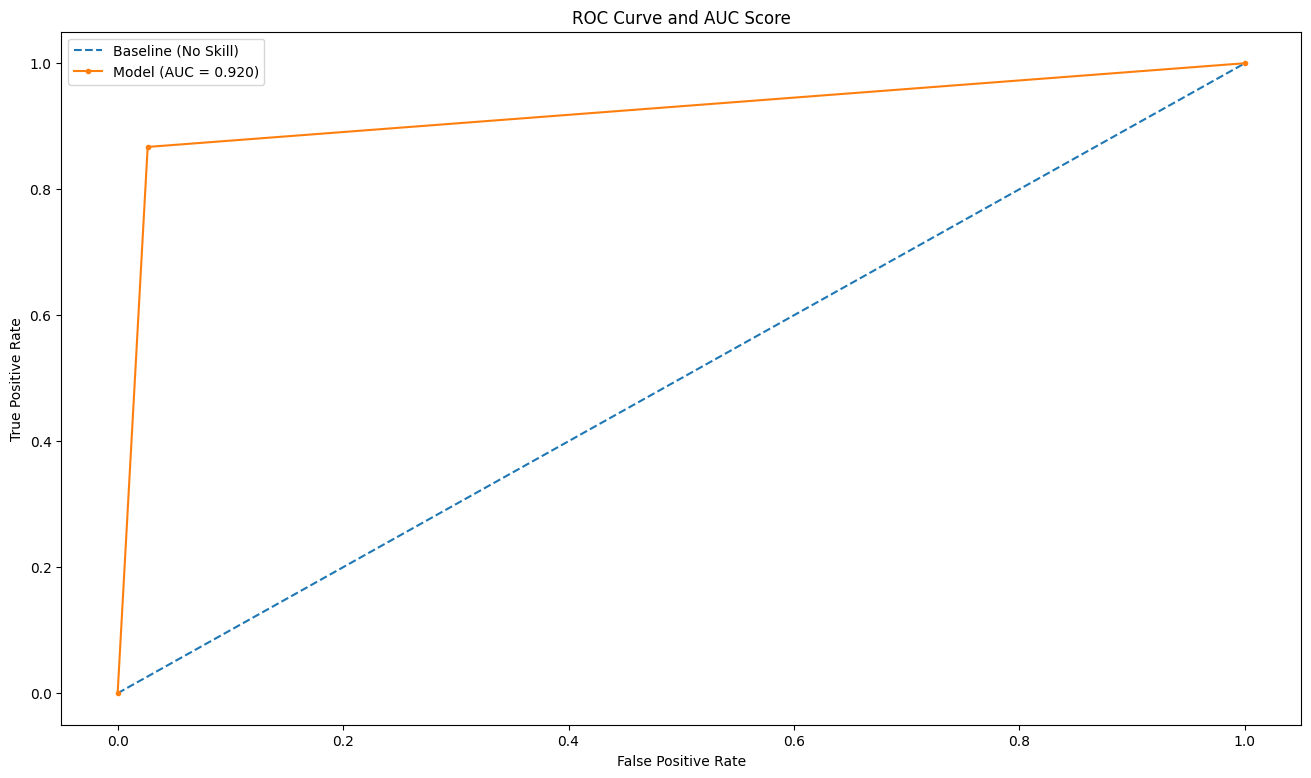

In [221]:
plot_roc_auc_curve(y_train_randomoversample, train_predictions)

Training Naive Bayes on test set

In [222]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')


Recall Score: 0.8111
Precision Score: 0.0443
F1 Score: 0.0841
Accuracy Score: 0.9720
AUC Score: 0.8917


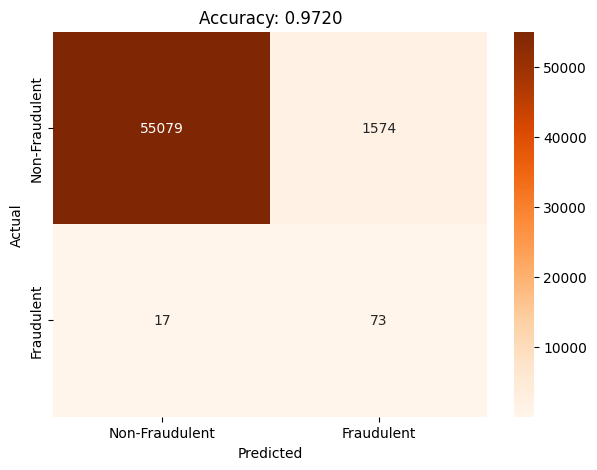


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56653
           1       0.04      0.81      0.08        90

    accuracy                           0.97     56743
   macro avg       0.52      0.89      0.53     56743
weighted avg       1.00      0.97      0.98     56743



In [223]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)


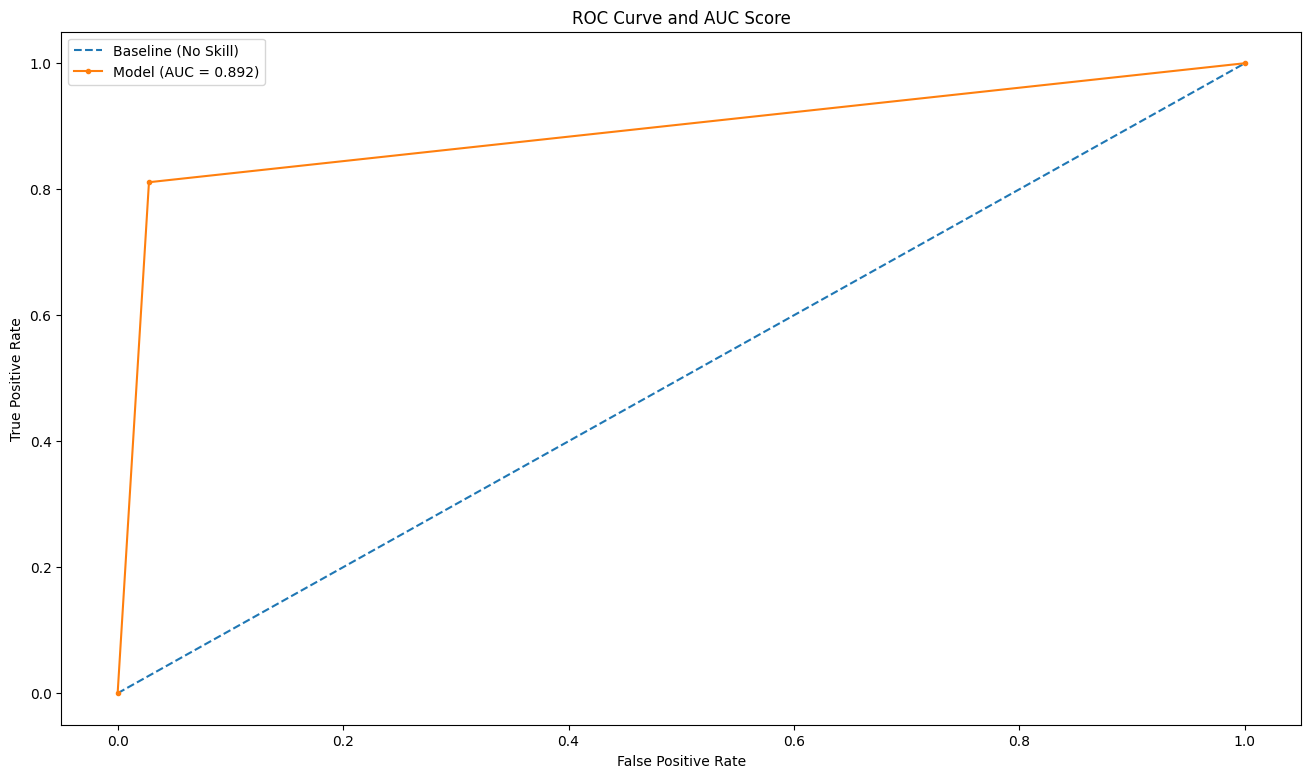

In [224]:
plot_roc_auc_curve(y_test, test_predictions)

3.KNN

In [225]:
# Initialize and train the KNeighboursClassifier model
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(X_train_random_oversample, y_train_randomoversample)

# Predict on training and testing sets
train_predictions = KNN_model.predict(X_train_random_oversample)
test_predictions = KNN_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [226]:
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train_randomoversample, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train_randomoversample, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train_randomoversample, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train_randomoversample, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train_randomoversample, train_predictions):.4f}')

Recall Score: 1.0000
Precision Score: 0.9996
F1 Score: 0.9998
Accuracy Score: 0.9998
AUC Score: 0.9998


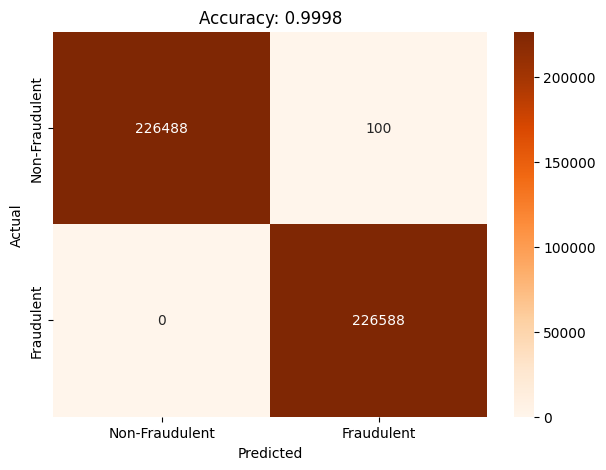


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226588
           1       1.00      1.00      1.00    226588

    accuracy                           1.00    453176
   macro avg       1.00      1.00      1.00    453176
weighted avg       1.00      1.00      1.00    453176



In [227]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_randomoversample, train_predictions)

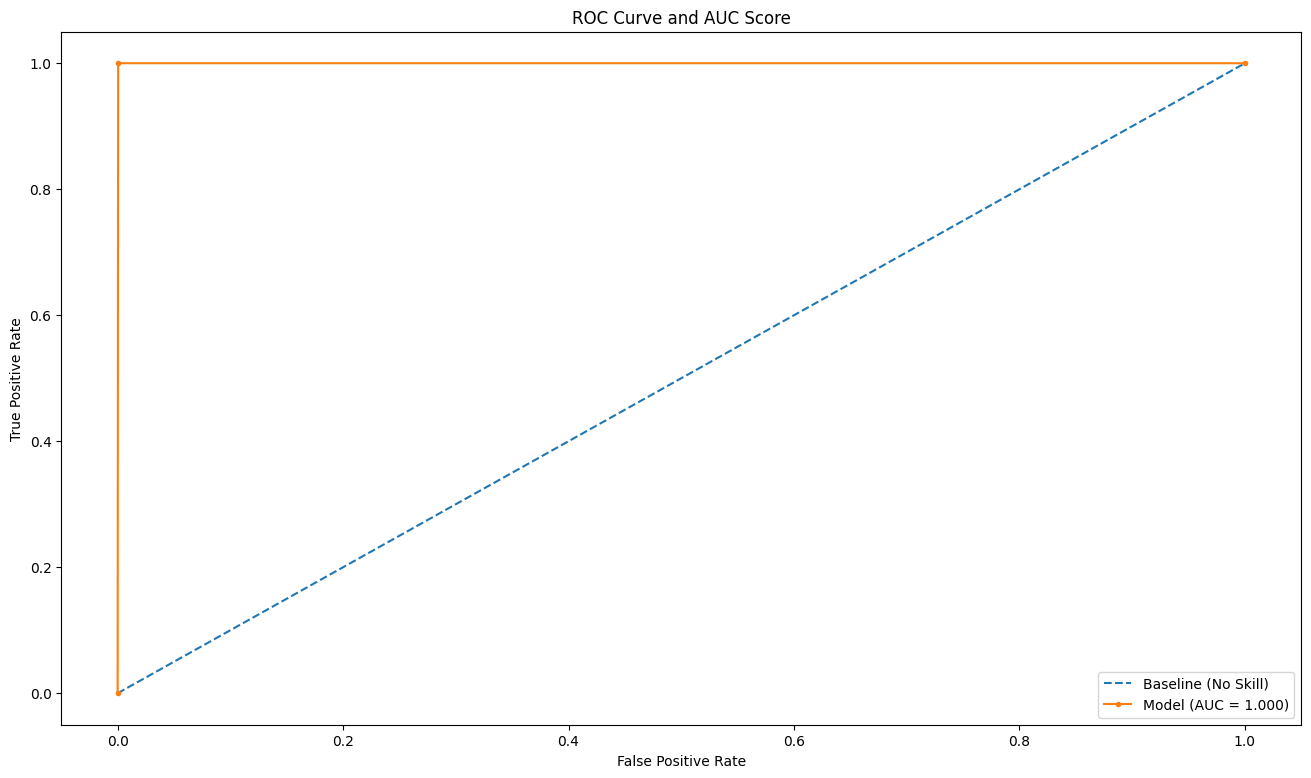

In [228]:
plot_roc_auc_curve(y_train_randomoversample, train_predictions)

Training KNN on test set

In [229]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.7889
Precision Score: 0.6514
F1 Score: 0.7136
Accuracy Score: 0.9990
AUC Score: 0.8941


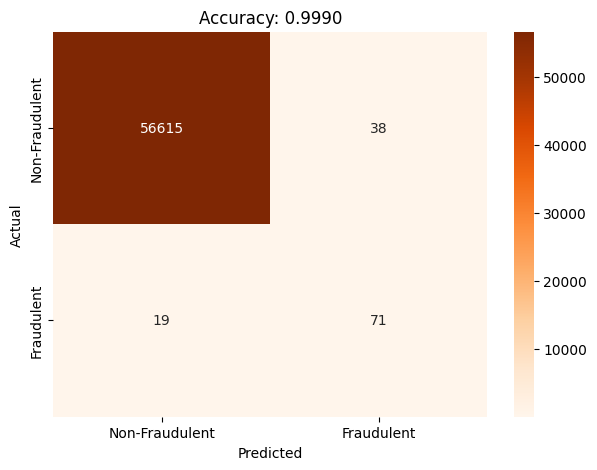


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56653
           1       0.65      0.79      0.71        90

    accuracy                           1.00     56743
   macro avg       0.83      0.89      0.86     56743
weighted avg       1.00      1.00      1.00     56743



In [230]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

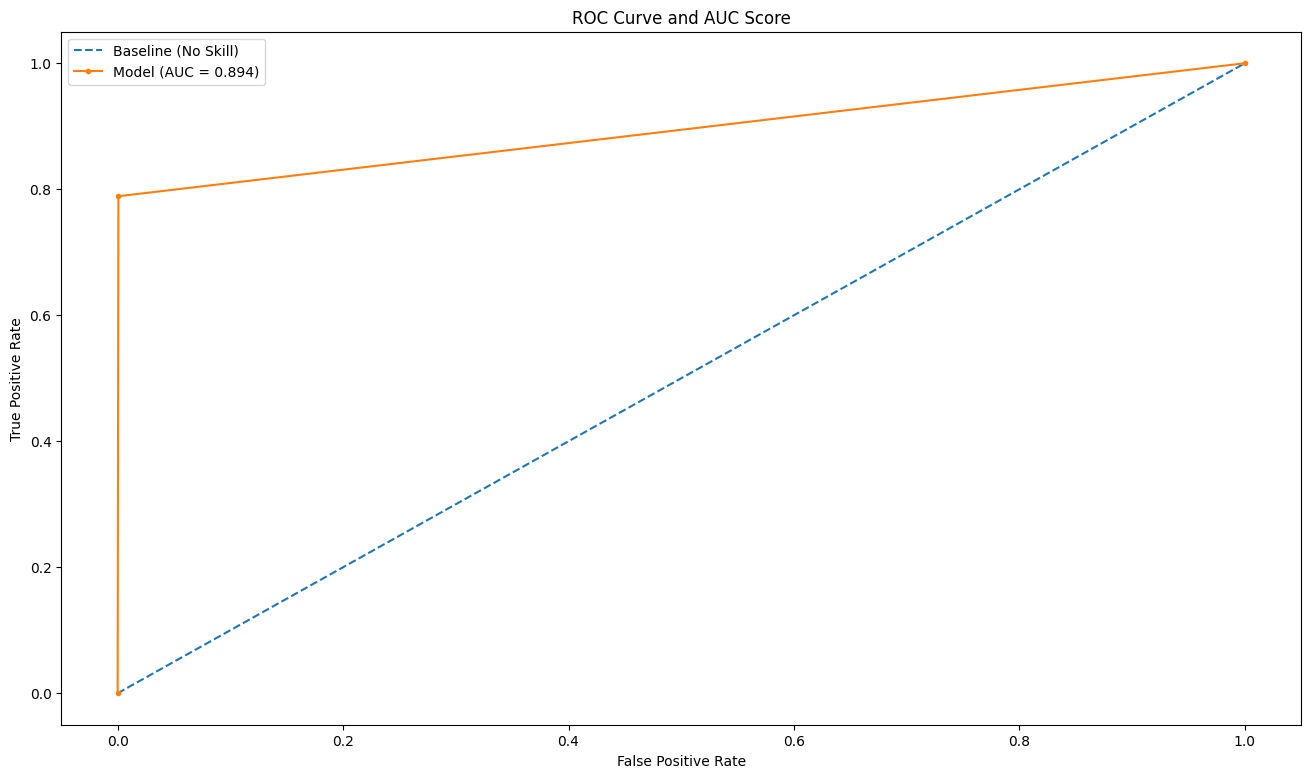

In [231]:
plot_roc_auc_curve(y_test, test_predictions)

4. Random Forest

In [232]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RF_model.fit(X_train_random_oversample, y_train_randomoversample)

# Predict on training and testing sets
train_predictions = RF_model.predict(X_train_random_oversample)
test_predictions = RF_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

In [233]:
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train_randomoversample, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train_randomoversample, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train_randomoversample, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train_randomoversample, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train_randomoversample, train_predictions):.4f}')

Recall Score: 1.0000
Precision Score: 1.0000
F1 Score: 1.0000
Accuracy Score: 1.0000
AUC Score: 1.0000


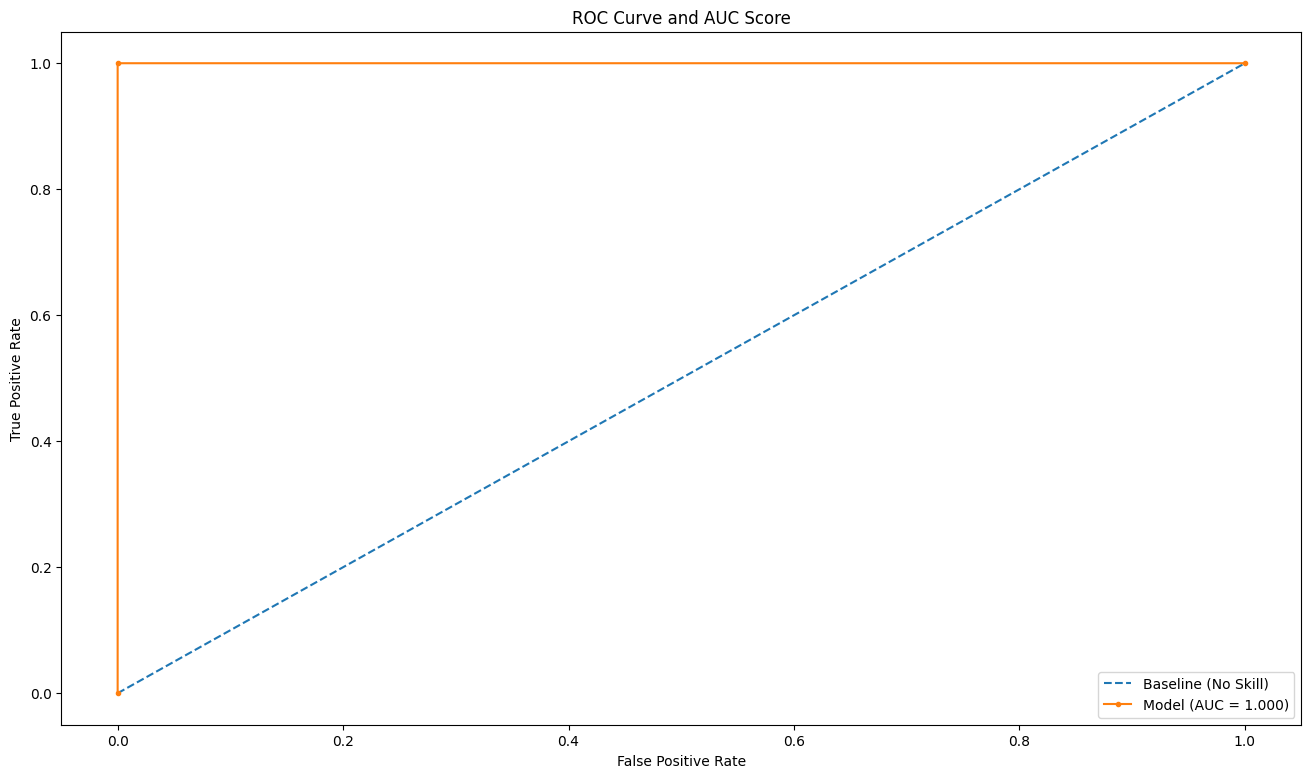

In [234]:
plot_roc_auc_curve(y_train_randomoversample, train_predictions)

Training Random Forest Model on test set

In [235]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.7222
Precision Score: 0.9559
F1 Score: 0.8228
Accuracy Score: 0.9995
AUC Score: 0.8611


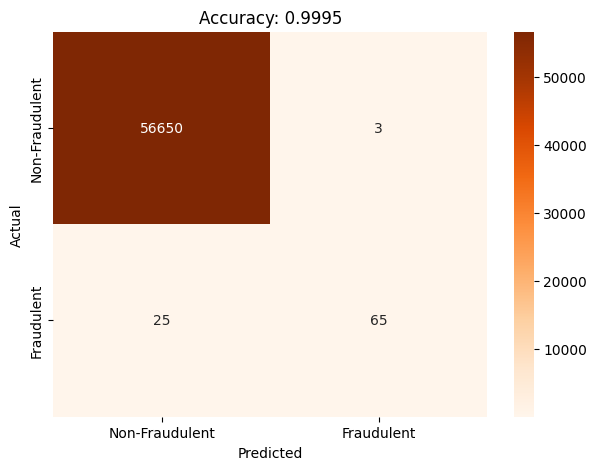


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56653
           1       0.96      0.72      0.82        90

    accuracy                           1.00     56743
   macro avg       0.98      0.86      0.91     56743
weighted avg       1.00      1.00      1.00     56743



In [236]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

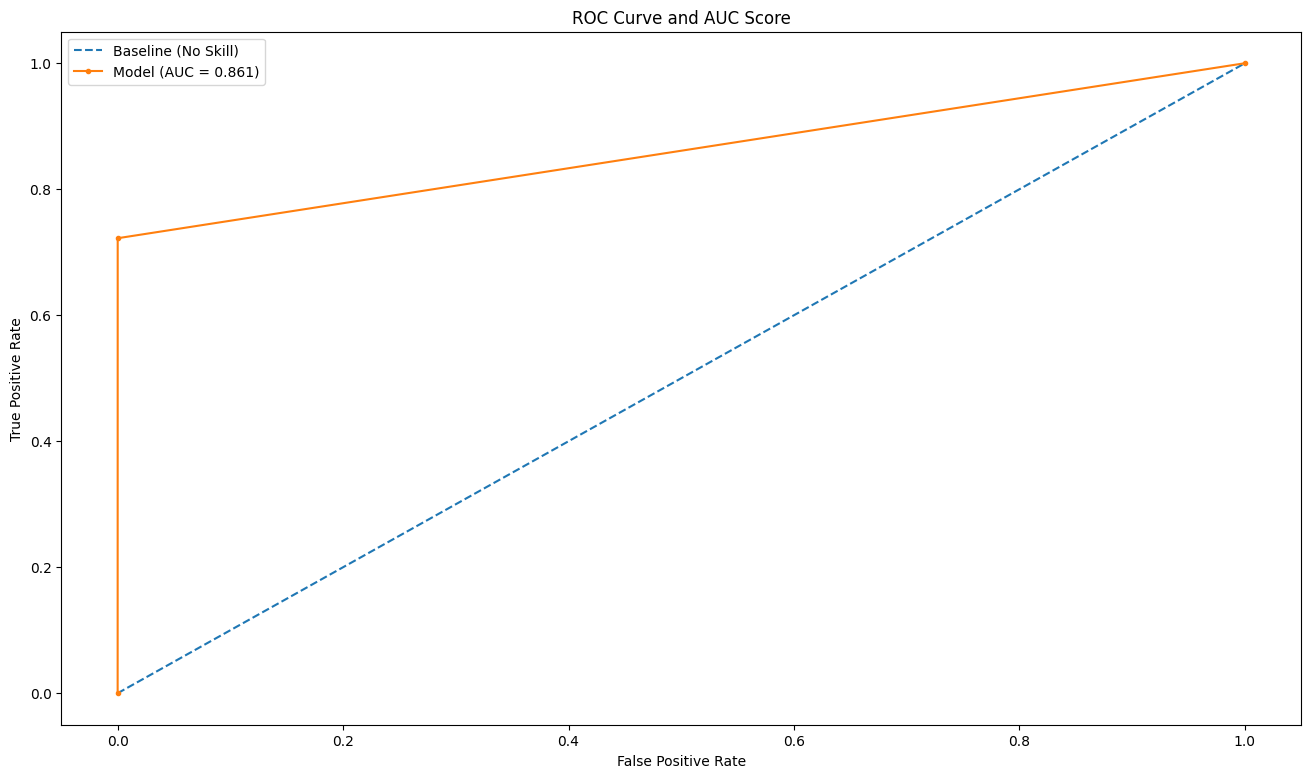

In [237]:
plot_roc_auc_curve(y_test, test_predictions)

5. AdaBoost

Training AdaBoost Model on Training set

In [238]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_random_oversample, y_train_randomoversample)
y_train_pred = adaboost_model.predict(X_train_random_oversample)
y_test_pred = adaboost_model.predict(X_test)
acc6 = accuracy_score(y_test, y_test_pred)

In [239]:
# Train Score
print(f'Recall score:{recall_score(y_train_randomoversample, y_train_pred):.4f}')
print(f'Precision score:{precision_score(y_train_randomoversample, y_train_pred):.4f}')
print(f'F1-Score:{f1_score(y_train_randomoversample, y_train_pred):.4f}')
print(f'Accuracy score:{accuracy_score(y_train_randomoversample, y_train_pred):.4f}')
print(f'AUC:{roc_auc_score(y_train_randomoversample, y_train_pred):.4f}')

Recall score:0.9712
Precision score:0.9851
F1-Score:0.9781
Accuracy score:0.9782
AUC:0.9782


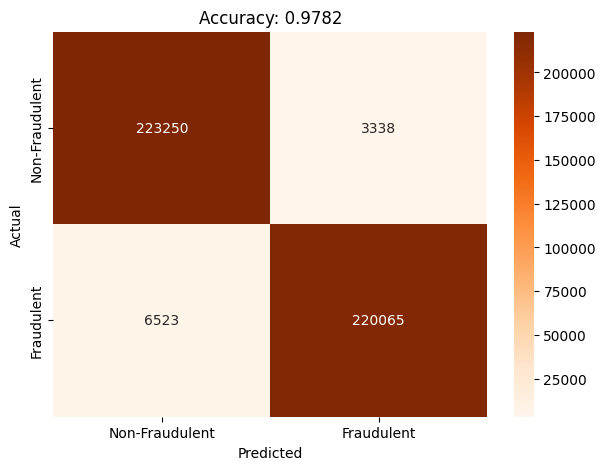


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    226588
           1       0.99      0.97      0.98    226588

    accuracy                           0.98    453176
   macro avg       0.98      0.98      0.98    453176
weighted avg       0.98      0.98      0.98    453176



In [240]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_randomoversample, y_train_pred)

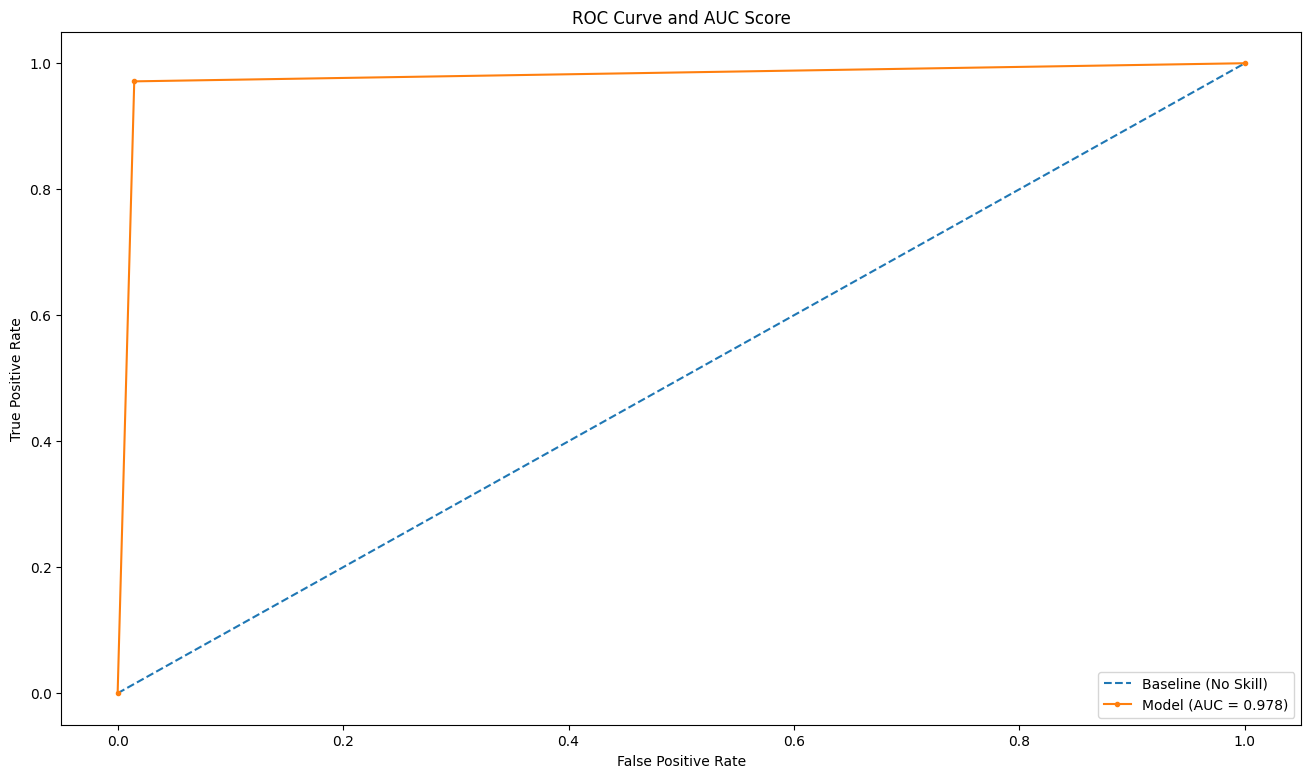

In [241]:
plot_roc_auc_curve(y_train_randomoversample, y_train_pred)

Training AdaBoost Model on Test set

In [242]:
print(f'Recall score:{recall_score(y_test, y_test_pred):.4f}')
print(f'Precision score:{precision_score(y_test, y_test_pred):.4f}')
print(f'F1-Score:{f1_score(y_test, y_test_pred):.4f}')
print(f'Accuracy score:{accuracy_score(y_test, y_test_pred):.4f}')
print(f'AUC:{roc_auc_score(y_test, y_test_pred):.4f}')

Recall score:0.8778
Precision score:0.0768
F1-Score:0.1413
Accuracy score:0.9831
AUC:0.9305


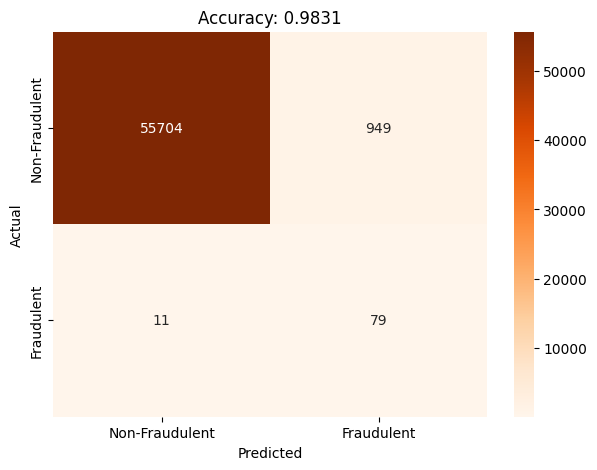


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56653
           1       0.08      0.88      0.14        90

    accuracy                           0.98     56743
   macro avg       0.54      0.93      0.57     56743
weighted avg       1.00      0.98      0.99     56743



In [243]:
# Test Predictions
display_confusion_matrix_and_metrics(y_test, y_test_pred)

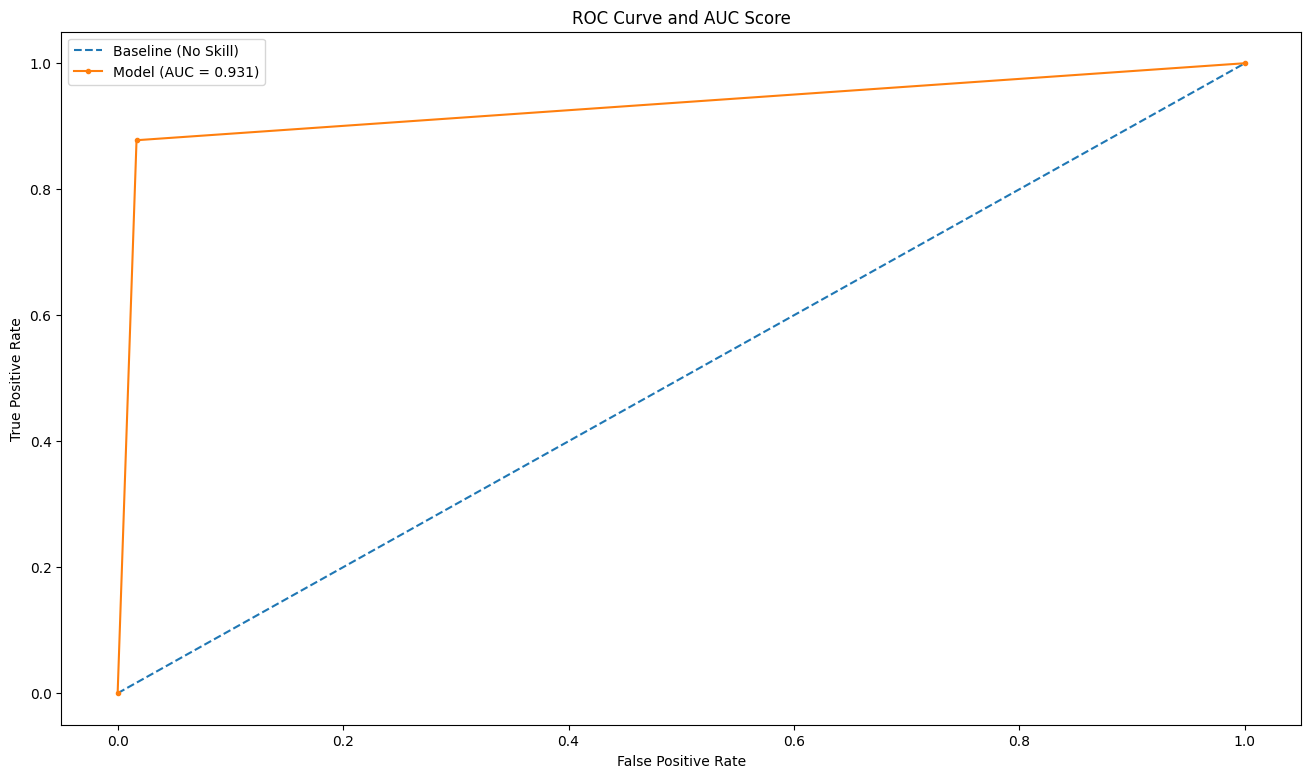

In [244]:
plot_roc_auc_curve(y_test, y_test_pred)

6. LightGBM

Training LightGBM Model on Training set

In [246]:
from lightgbm import LGBMClassifier
LGB_model = LGBMClassifier()
LGB_model.fit(X_train_random_oversample, y_train_randomoversample)
y_train_pred = LGB_model.predict(X_train_random_oversample)
y_test_pred = LGB_model.predict(X_test)
acc8 = accuracy_score(y_test, y_test_pred)

[LightGBM] [Info] Number of positive: 226588, number of negative: 226588
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7903
[LightGBM] [Info] Number of data points in the train set: 453176, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [247]:
# Train Score
print(f'Recall score:{recall_score(y_train_randomoversample, y_train_pred):.4f}')
print(f'Precision score:{precision_score(y_train_randomoversample, y_train_pred):.4f}')
print(f'F1-Score:{f1_score(y_train_randomoversample, y_train_pred):.4f}')
print(f'Accuracy score:{accuracy_score(y_train_randomoversample, y_train_pred):.4f}')
print(f'AUC:{roc_auc_score(y_train_randomoversample, y_train_pred):.4f}')

Recall score:1.0000
Precision score:1.0000
F1-Score:1.0000
Accuracy score:1.0000
AUC:1.0000


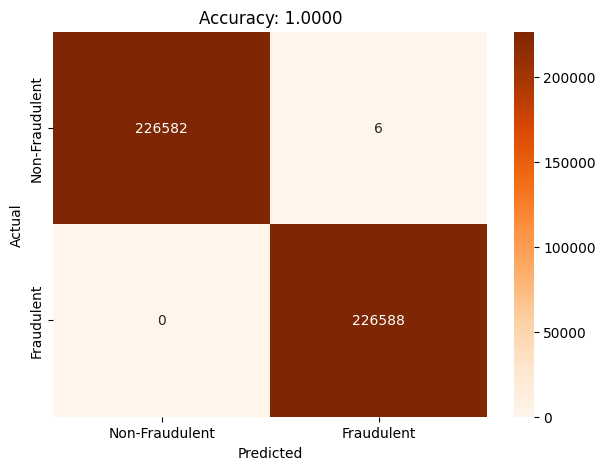


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226588
           1       1.00      1.00      1.00    226588

    accuracy                           1.00    453176
   macro avg       1.00      1.00      1.00    453176
weighted avg       1.00      1.00      1.00    453176



In [248]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train_randomoversample, y_train_pred)

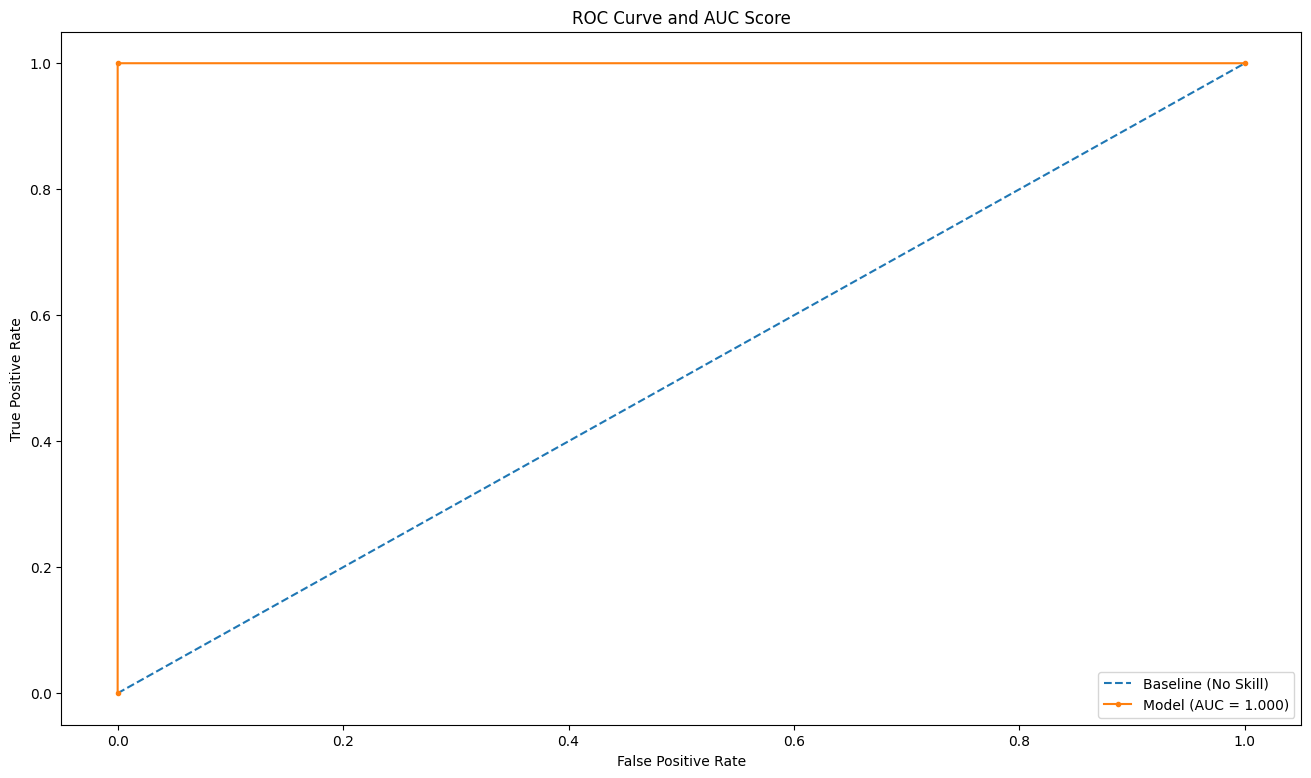

In [249]:
plot_roc_auc_curve(y_train_randomoversample, y_train_pred)

Training LightGBM Model on Test set

In [250]:
# Test score
print(f'Recall score:{recall_score(y_test, y_test_pred):.4f}')
print(f'Precision score:{precision_score(y_test, y_test_pred):.4f}')
print(f'F1-Score:{f1_score(y_test, y_test_pred):.4f}')
print(f'Accuracy score:{accuracy_score(y_test, y_test_pred):.4f}')
print(f'AUC:{roc_auc_score(y_test, y_test_pred):.4f}')

Recall score:0.7889
Precision score:0.7978
F1-Score:0.7933
Accuracy score:0.9993
AUC:0.8943


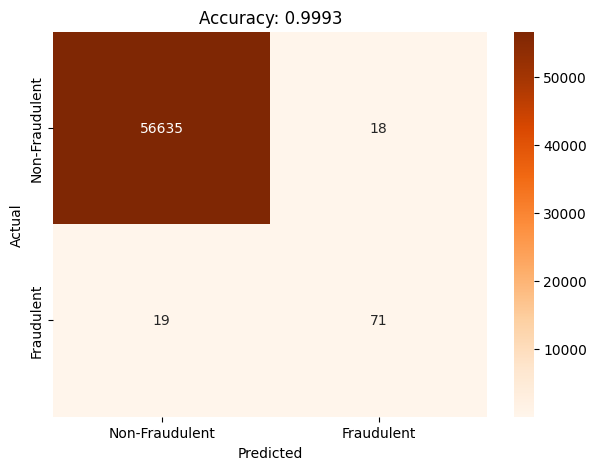


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56653
           1       0.80      0.79      0.79        90

    accuracy                           1.00     56743
   macro avg       0.90      0.89      0.90     56743
weighted avg       1.00      1.00      1.00     56743



In [251]:
# Test Predictions
display_confusion_matrix_and_metrics(y_test, y_test_pred)

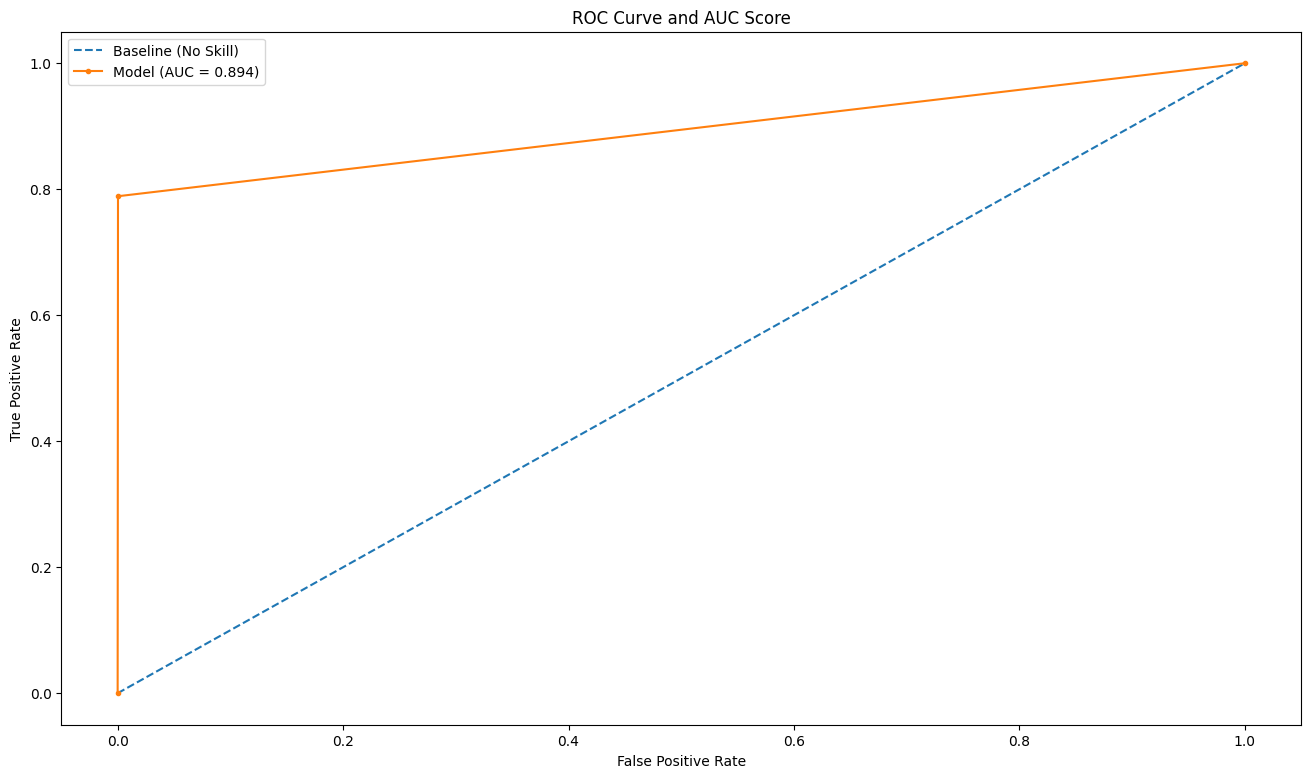

In [252]:
plot_roc_auc_curve(y_test, y_test_pred)